Code <span class="caret"></span>

-   <a href="#" id="rmd-show-all-code">Show All Code</a>
-   <a href="#" id="rmd-hide-all-code">Hide All Code</a>
-   
-   <a href="#" id="rmd-download-source">Download Rmd</a>

# Refinement

[**Download Chapter notebook
(ipynb)**](https://drive.usercontent.google.com/u/1/uc?id=1cqu1pvFr9rWK92CUZX7u2bI6W7NYRpxK&export=download)

[**Download Chapter
PDF**](https://drive.usercontent.google.com/u/1/uc?id=19SuFCaGlQz1_4cc3nESKTEadR2B_wtW3&export=download)

[<span style="color: rgb(255, 0, 0);">**Mandatory Lesson Feedback
Survey**</span>](https://docs.google.com/forms/d/e/1FAIpQLSdr0capF7jloJhPH3Pki1B3LZoKOG16poOpuVJ7SL2LkwLHQA/viewform?pli=1)

-   How do different evaluation metrics differ?
-   What techniques are used to improve on chance prediction?
-   What are the limitations of a confusion matrix?
-   How can normalisation and hyperparameter tuning help to improve the
    results?
-   How could test data leakage be avoided?

-   Introducing different types of metrics for model evaluation.
-   Understanding the permutation score.
-   Illustrating model evaluation using the confusion matrix.
-   working with normalisation and hyperparameter tuning.
-   The concept of progressive adjustment.

  

  

### **Import functions**

``` python
from numpy import mgrid, linspace, c_, arange, mean, array
from numpy.random import uniform, seed
from sklearn.datasets import make_circles
from mpl_toolkits import mplot3d
from matplotlib.pyplot import subplots, axes, scatter, xticks, show

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

RANDOM_STATE = 111

classifiers = {
    'Random Forest': RandomForestClassifier(random_state=RANDOM_STATE),
    'AdaBoost (Random Forest)': AdaBoostClassifier(RandomForestClassifier(random_state=RANDOM_STATE)),
    'Extra Trees': ExtraTreesClassifier(random_state=RANDOM_STATE),
    'AdaBoost (Extra Tree)': AdaBoostClassifier(ExtraTreesClassifier(random_state=RANDOM_STATE)),
    'Decision Tree': DecisionTreeClassifier(random_state=RANDOM_STATE),
    'SVC (RBF)': SVC(random_state=RANDOM_STATE),
    'SVC (Linear)': LinearSVC(random_state=RANDOM_STATE),
    'Multi-layer Perceptron': MLPClassifier(max_iter=5000, random_state=RANDOM_STATE)
}
```

## Revision Example with Circular Test Data

For our classification problem, we will use the `make_circles` function.
See the
[documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html)

The parameters for noise level and relative size of the two circles are
such that the task becomes difficult.

``` python
seed(RANDOM_STATE)

X, y = make_circles(n_samples=500, factor=0.5, noise=.3, random_state=RANDOM_STATE)

feature_1, feature_2 = 0, 1
ft_min, ft_max = X.min(), X.max()

print('Shape of X:', X.shape)

fig, ax = subplots(figsize=(10, 5), nrows=1, ncols=2)

ax[0].scatter(X[:, feature_1], X[:, feature_2], c=y, s=4, cmap='bwr');
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 1')
ax[1].hist(X);
ax[1].set_xlabel('Value')
ax[1].set_ylabel('Count')

show()
```

    Shape of X: (500, 2)

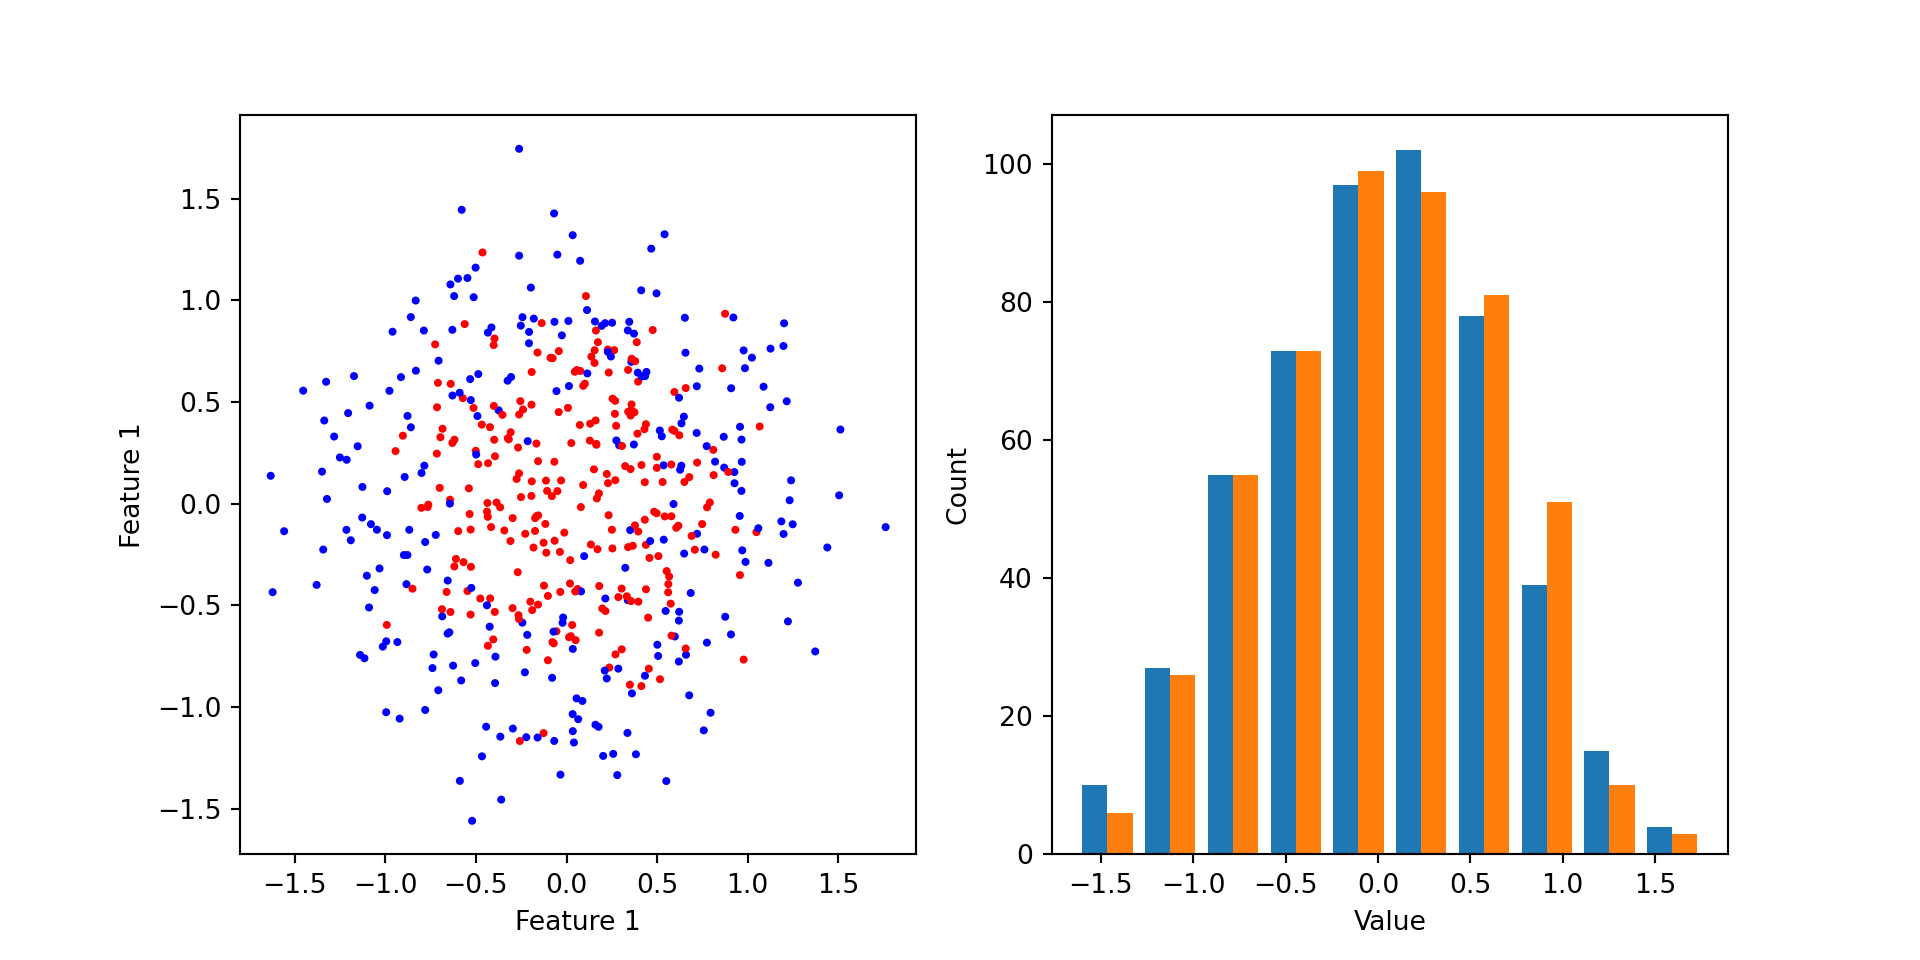

For training, we use the same classifiers as in the previous Lesson. We
train on the whole data set and then use a meshgrid of the state space
for prediction.

``` python
ft_min, ft_max = -1.5, 1.5

# Constructing (2 grids x 300 rows x 300 cols):
grid_1, grid_2 = mgrid[ft_min:ft_max:.01, ft_min:ft_max:.01]

# We need only the shape for one of the grids (i.e. 300 x  300):
grid_shape = grid_1.shape

# state space grid for testing
new_obs = c_[grid_1.ravel(), grid_2.ravel()]
```

``` python
contour_levels = linspace(0, 1, 6)

fig, all_axes = subplots(figsize=[15, 5], ncols=4, nrows=2, sharey=True, sharex=True)

for ax, (name, clf) in zip(all_axes.ravel(), classifiers.items()):

    clf.fit(X, y)

    y_pred = clf.predict(new_obs)
    y_pred_grid = y_pred.reshape(grid_shape)
    print("")

    ax.scatter(X[:, feature_1], X[:, feature_2], c=y, s=1, cmap='bwr_r')
    ax.contourf(grid_1, grid_2, y_pred_grid, cmap='gray_r', alpha=.2, levels=contour_levels);

    ax.set_ylim(ft_min, ft_max)
    ax.set_xlim(ft_min, ft_max)
    ax.set_yticks([ft_min, 0, ft_max])
    ax.set_xticks([ft_min, 0, ft_max])
    ax.set_title(name, fontsize=10);

show()
```

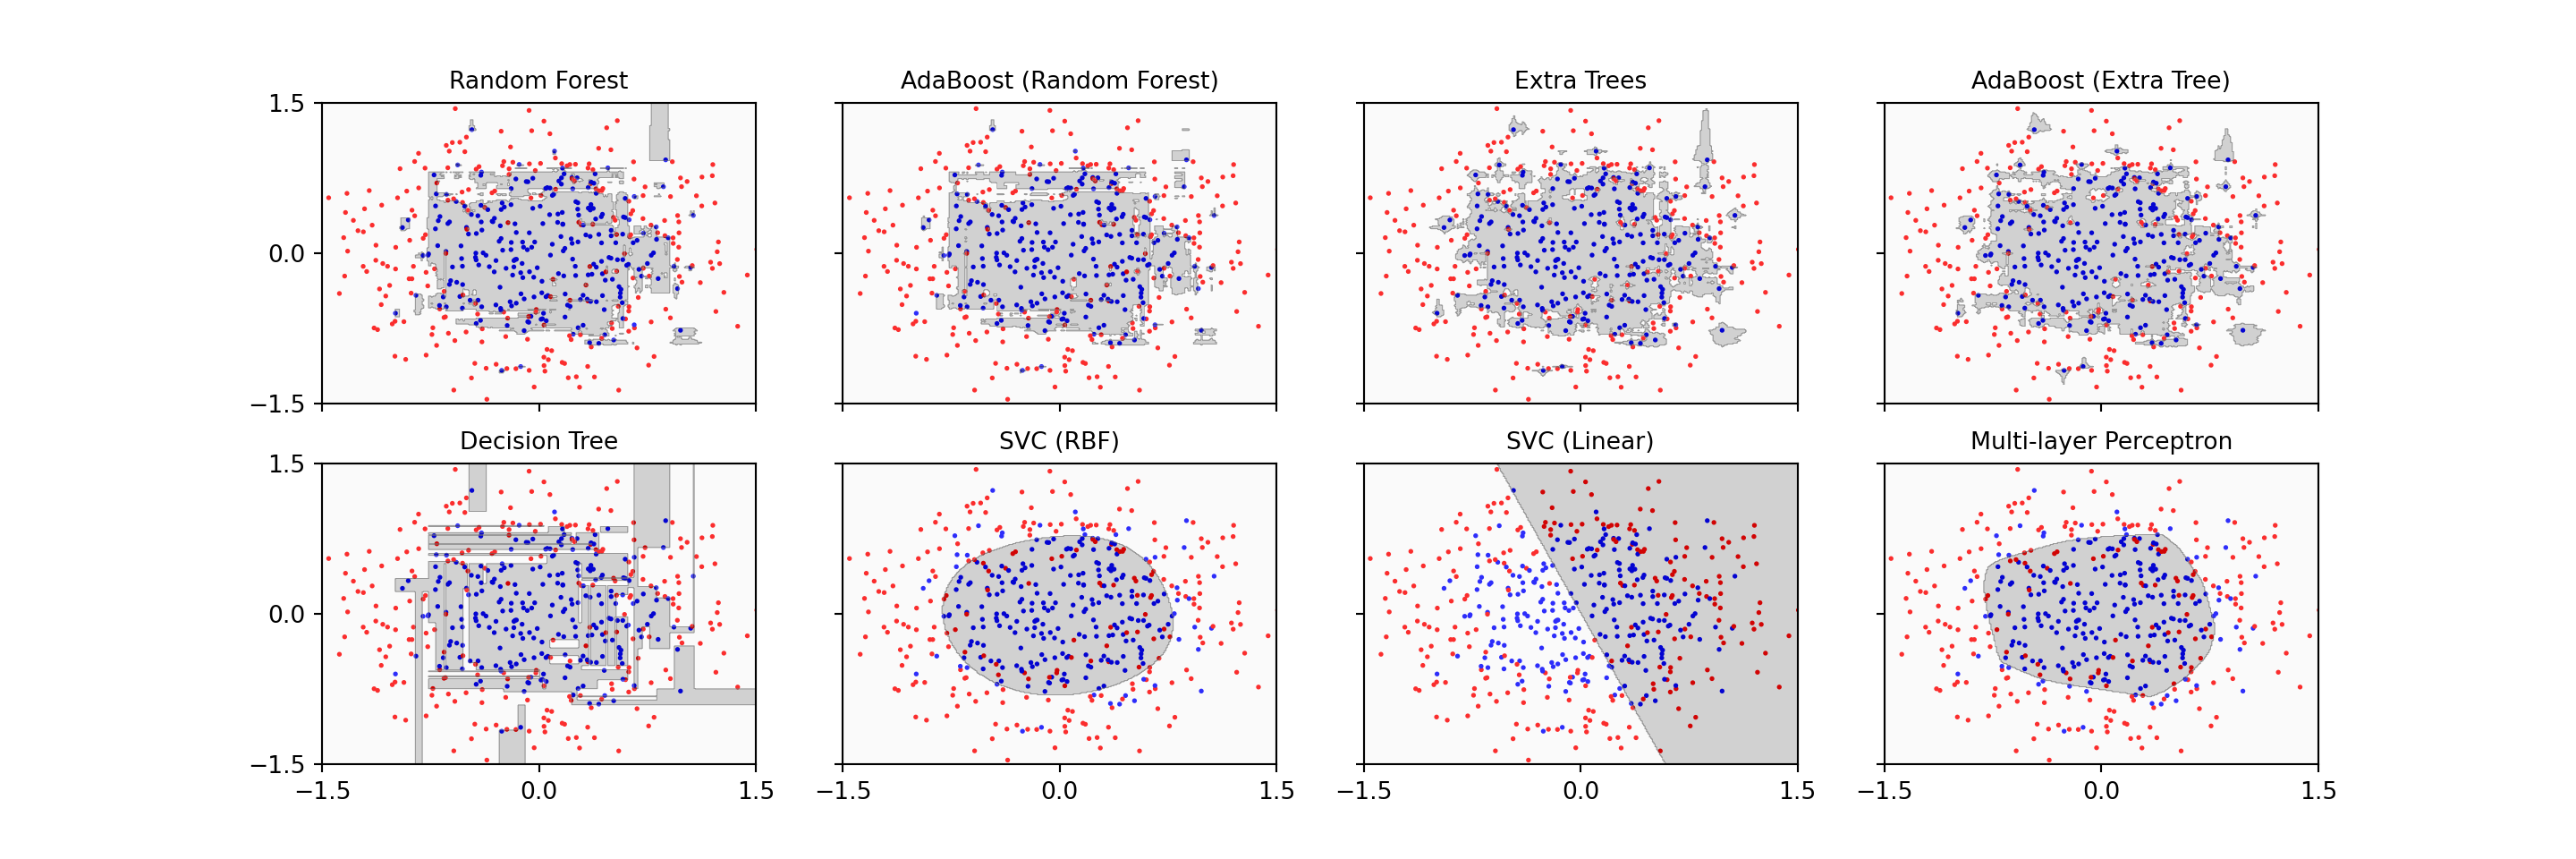

Seven of the eight classifiers are able to separate the inner data set
from the outer data set successfully. The main difference is that some
algorithms ended up with a more rectangular shape of the boundary
whereas the others find a more circular form which reflects the original
data distribution more closely. One classifier simply fails: SVC
(linear). It tries to fit a straight line to separate the classes which
in this case is impossible.

## Note

**Code**: Note how the keyword argument `sharey` is used in the call of
`subplots` to have y-axis only labelled once. The name of the classifier
is extracted from the dictionary as its key and used to set up the title
of each panel.

## Metrics

We already used the score to evaluate the model performance. Here are
some further metrics used in machine learning.

**Accuracy** is a metric that evaluates the integrity of the model by
comparing true labels with their predicted counterparts. It produces a
value between 0 and 1, where 1 is the best possible outcome, and
<span class="math inline">\\1 / n\_{classes}\\</span> represents the
probability of a random guess. See [the Scikit-learn documentation for
the
accuracy_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
The mathematical formula can be found in the [metrics and scoring
section of the
documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score).

**Recall** is a metric that evaluates the ability of a classification
model to find true positive labels. The measure produces a scalar value
between 0 and 1, where 1 is the perfect outcome. See [the Scikit-learn
documentation for the
recall_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html).
The recall is the percentage of true predictions of the overall number
of predictions. It is also known as *sensitivity*.

**Average Precision**, also referred to as AP, is a metric that produces
a scalar value for the precision-recall curve between and with being the
outcome. The metric obtains this value by weighing:

-   the mean of precisions (P) at each threshold (n),
-   the increase in recall (R) from the previous threshold (n-1).

The metric is mathematically defined as follows:

<span class="math display">\\ AP = \sum\_{n}^{}(R_n - R\_{n-1}) \cdot P
\\</span>

## Average precision vs AUC

As you may have noticed, the AUC metric also evaluates the area under
the precision-recall curve using the trapezoid rule and with linear
interpolation. The interpolation, however, may cause the resulting
output to be better than it actually is. In other words, the AUC measure
evaluates the outcome rather optimistically.

Precision is also called the *positive predictive value*.

**F1 Score** Another useful metric to evaluate a classification model
that relies on precision and recall is the F1 Score, see the
[Scikit-learn
documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html).
It is mathematically defined as:

<span class="math display">\\ F_1 = 2 \cdot \frac{P\cdot R}{P+R}
\\</span>

where <span class="math inline">\\P\\</span> and
<span class="math inline">\\R\\</span> represent precision and recall,
respectively.

Wikipedia has a [nice summary of the measures and connections between
them](https://en.wikipedia.org/wiki/Precision_and_recall).

In Scikit-learn, these measures can be used in a standardised fashion.
Here is an example using the `recall_score`.

``` python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=RANDOM_STATE, shuffle=True)

print(X_train.shape, X_test.shape)
```

    (250, 2) (250, 2)

``` python
from sklearn.metrics import recall_score

fig, all_axes = subplots(figsize=[15, 5], ncols=4, nrows=2, sharey=True, sharex=True)

for ax, (name, clf) in zip(all_axes.ravel(), classifiers.items()):

    # Training the model using training data:
    clf.fit(X_train, y_train)

    y_pred_gr = clf.predict(new_obs)
    y_pred_grid = y_pred_gr.reshape(grid_shape)

    y_predicted = clf.predict(X_test)
    print("")
    # Evaluating the score using test data:
    score = clf.score(X_test, y_test)
    recall = recall_score(y_test, y_predicted)

    # Scattering the test data only:
    ax.scatter(X_test[:, feature_1], X_test[:, feature_2], c=y_test, s=4, cmap='bwr', marker='.')
    print("")
    ax.contourf(grid_1, grid_2, y_pred_grid, cmap='gray_r', alpha=.2, levels=contour_levels)

    ax.set_ylim(ft_min, ft_max)
    ax.set_xlim(ft_min, ft_max)
    ax.set_yticks([-1.5, 0, 1.5])
    ax.set_xticks([-1.5, 0, 1.5])

    label = '{} - Recall: {:.2f}'.format(name, recall)
    ax.set_title(label , fontsize=10);

show()
```

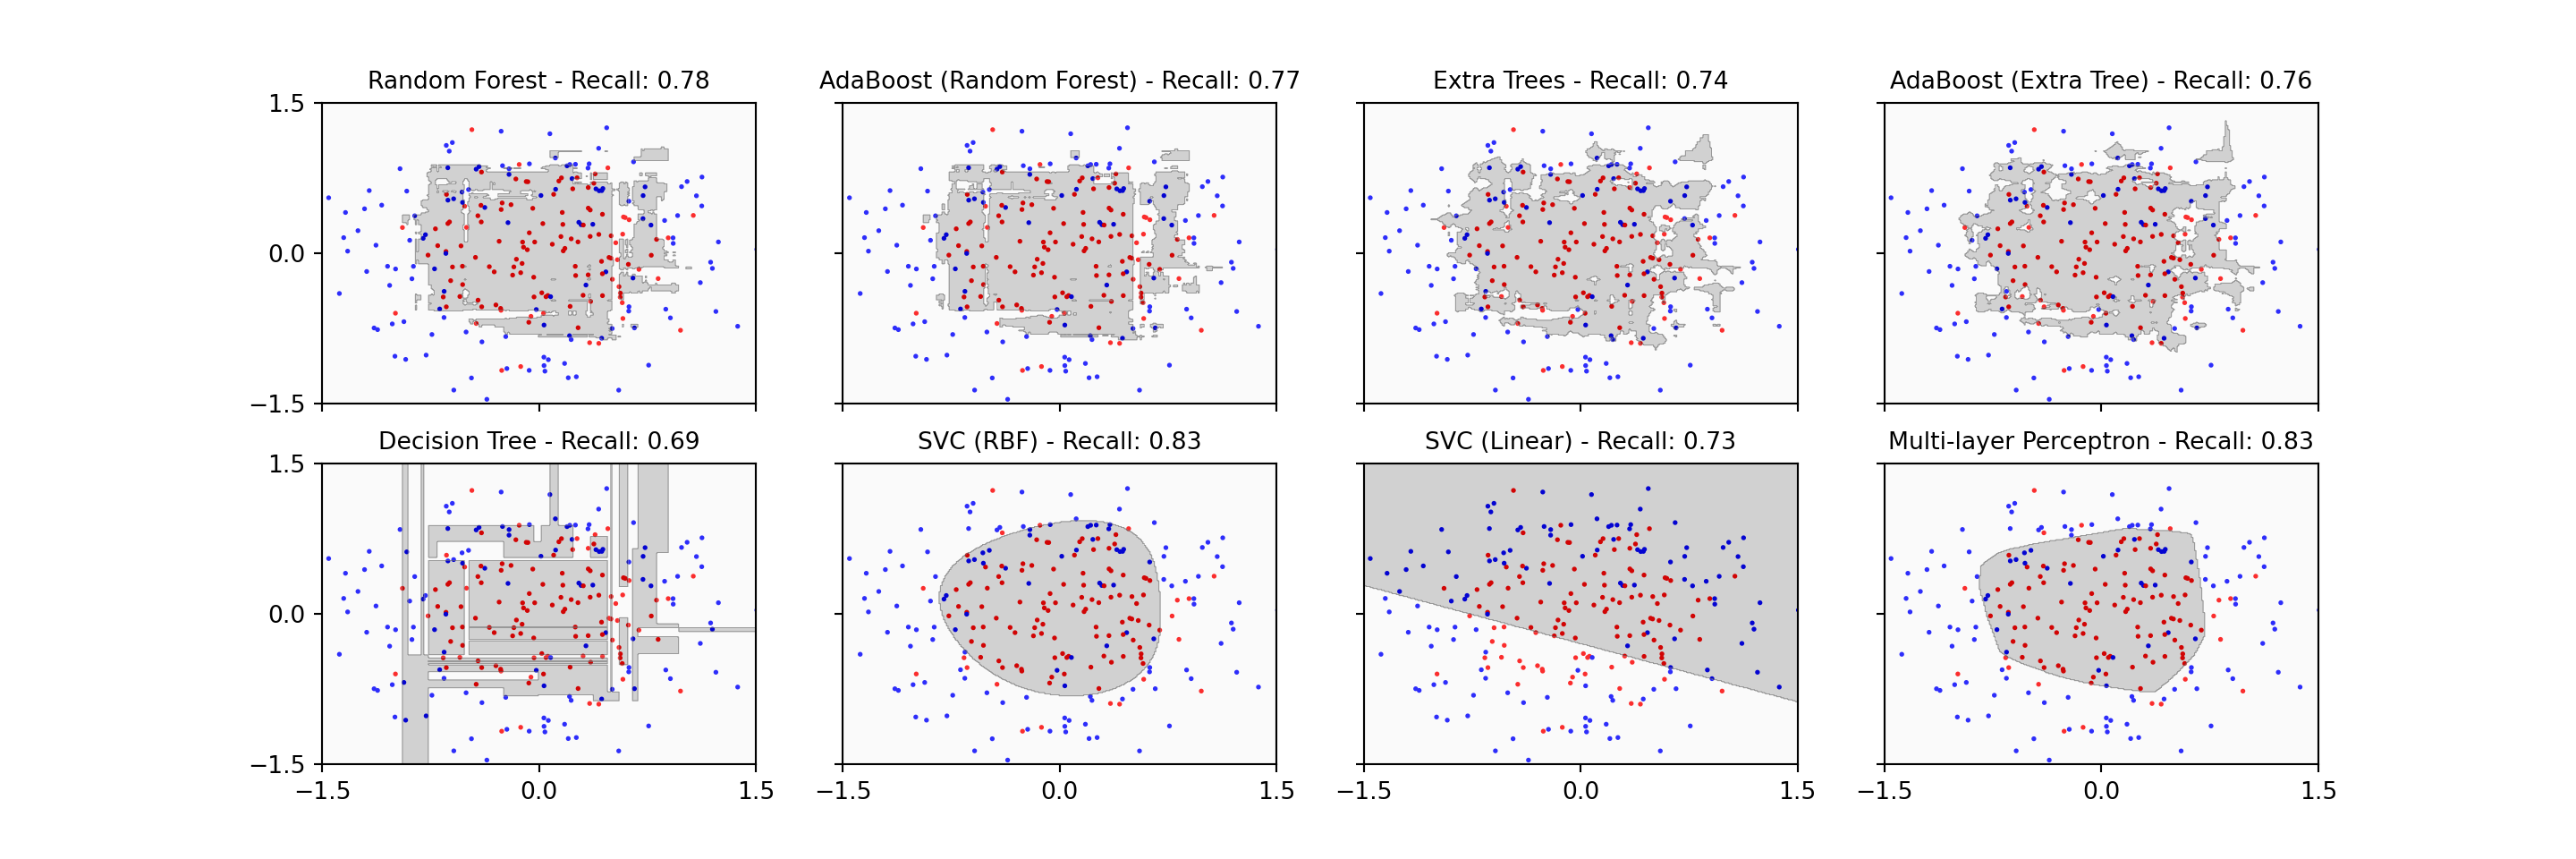

### **Reducing Bias on Test Data**

Whilst `SciKit Learn` provides us with a dedicated function to obtain
accuracy, the value it provides depends on how our training and test
data have been split. Using the train-test-split, we can randomly
shuffle the data to address this very problem. However, this implicitly
assumed that our original data followed a specific distribution which is
best represented by shuffling the data. That may not always be the case.
In practice, we can never fully eliminate this type of bias. What we can
do, however, is to split, shuffle, and permute the samples in the
original dataset repeatedly to minimise the likelihood of bias.

## Permutation Score

When dealing with biological and medical data, the results of machine
learning often are not clear-cut. The question remains whether or not to
trust a predictor as being truly above chance levels. An effective
technique to address this is to randomly shuffle the labels
independently of the data. I.e. we permutate only the labels, and check
whether the classification score actually decreases. The **permutation
score** then quantifies how trustworthy the result with the correct
labels is. See [the Scikit-learn
documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.permutation_test_score.html)
for details.

Now that we know about evaluation metrics, we are set to properly begin
the evaluation process. We can use so-called cross-validators for
testing the models if a test is run many times on data with differently
permuted labels. To facilitate this, Scikit-learn provides the function
`permutation_test_score`.

## Note

The process of cross-validation is computationally expensive, as is the
process of repeatedly permuting, fitting, and testing our models. In
this context, we will be using both processes to complement each other.
This makes the operation time-consuming and slow.

When possible, Scikit-learn provides us the with ability to use multiple
CPU cores to speed up intensive computations through multiprocessing.
Where available, this can be achieved by setting the `n_jobs` argument
of a function or a class to the number of CPU cores we wish to use.
Conveniently, it can be set to `n_jobs=-1` to use all available CPU
cores (see e.g. [the Hyperparameter Tuning section]() below). Here, we
have shown the use of only one core with `n_jobs=1` which is
computationally slow. You can adjust it according to the machine you are
using to make it faster.

The keyword argument `n_permutations` is set to 100 by default. You can
speed the cross-validation up by choosing a smaller number.

``` python
from sklearn.model_selection import permutation_test_score

n_classes = 2

chance = 1 / n_classes

fig, axes = subplots(figsize=[16, 12], ncols=4, nrows=2, sharey=True, sharex=True)

for ax, (name, clf) in zip(axes.ravel(), classifiers.items()):

    score, permutation_scores, pvalue = permutation_test_score(clf, X, y, scoring="accuracy", n_jobs=1,n_permutations=100)

    score_label = 'Score: {:.3f}, (p={:.4f})'.format(score, pvalue)
    print("")
    chance_label = 'Chance: {:.3f}'.format(chance)

    ax.hist(permutation_scores)
    ax.axvline(score,  c='g', label=score_label,  linewidth=3.0)
    ax.axvline(chance, c='r', label=chance_label, linewidth=3.0)
    ax.set_title(name, fontsize=10)
    ax.legend(fontsize=8)

show()
```

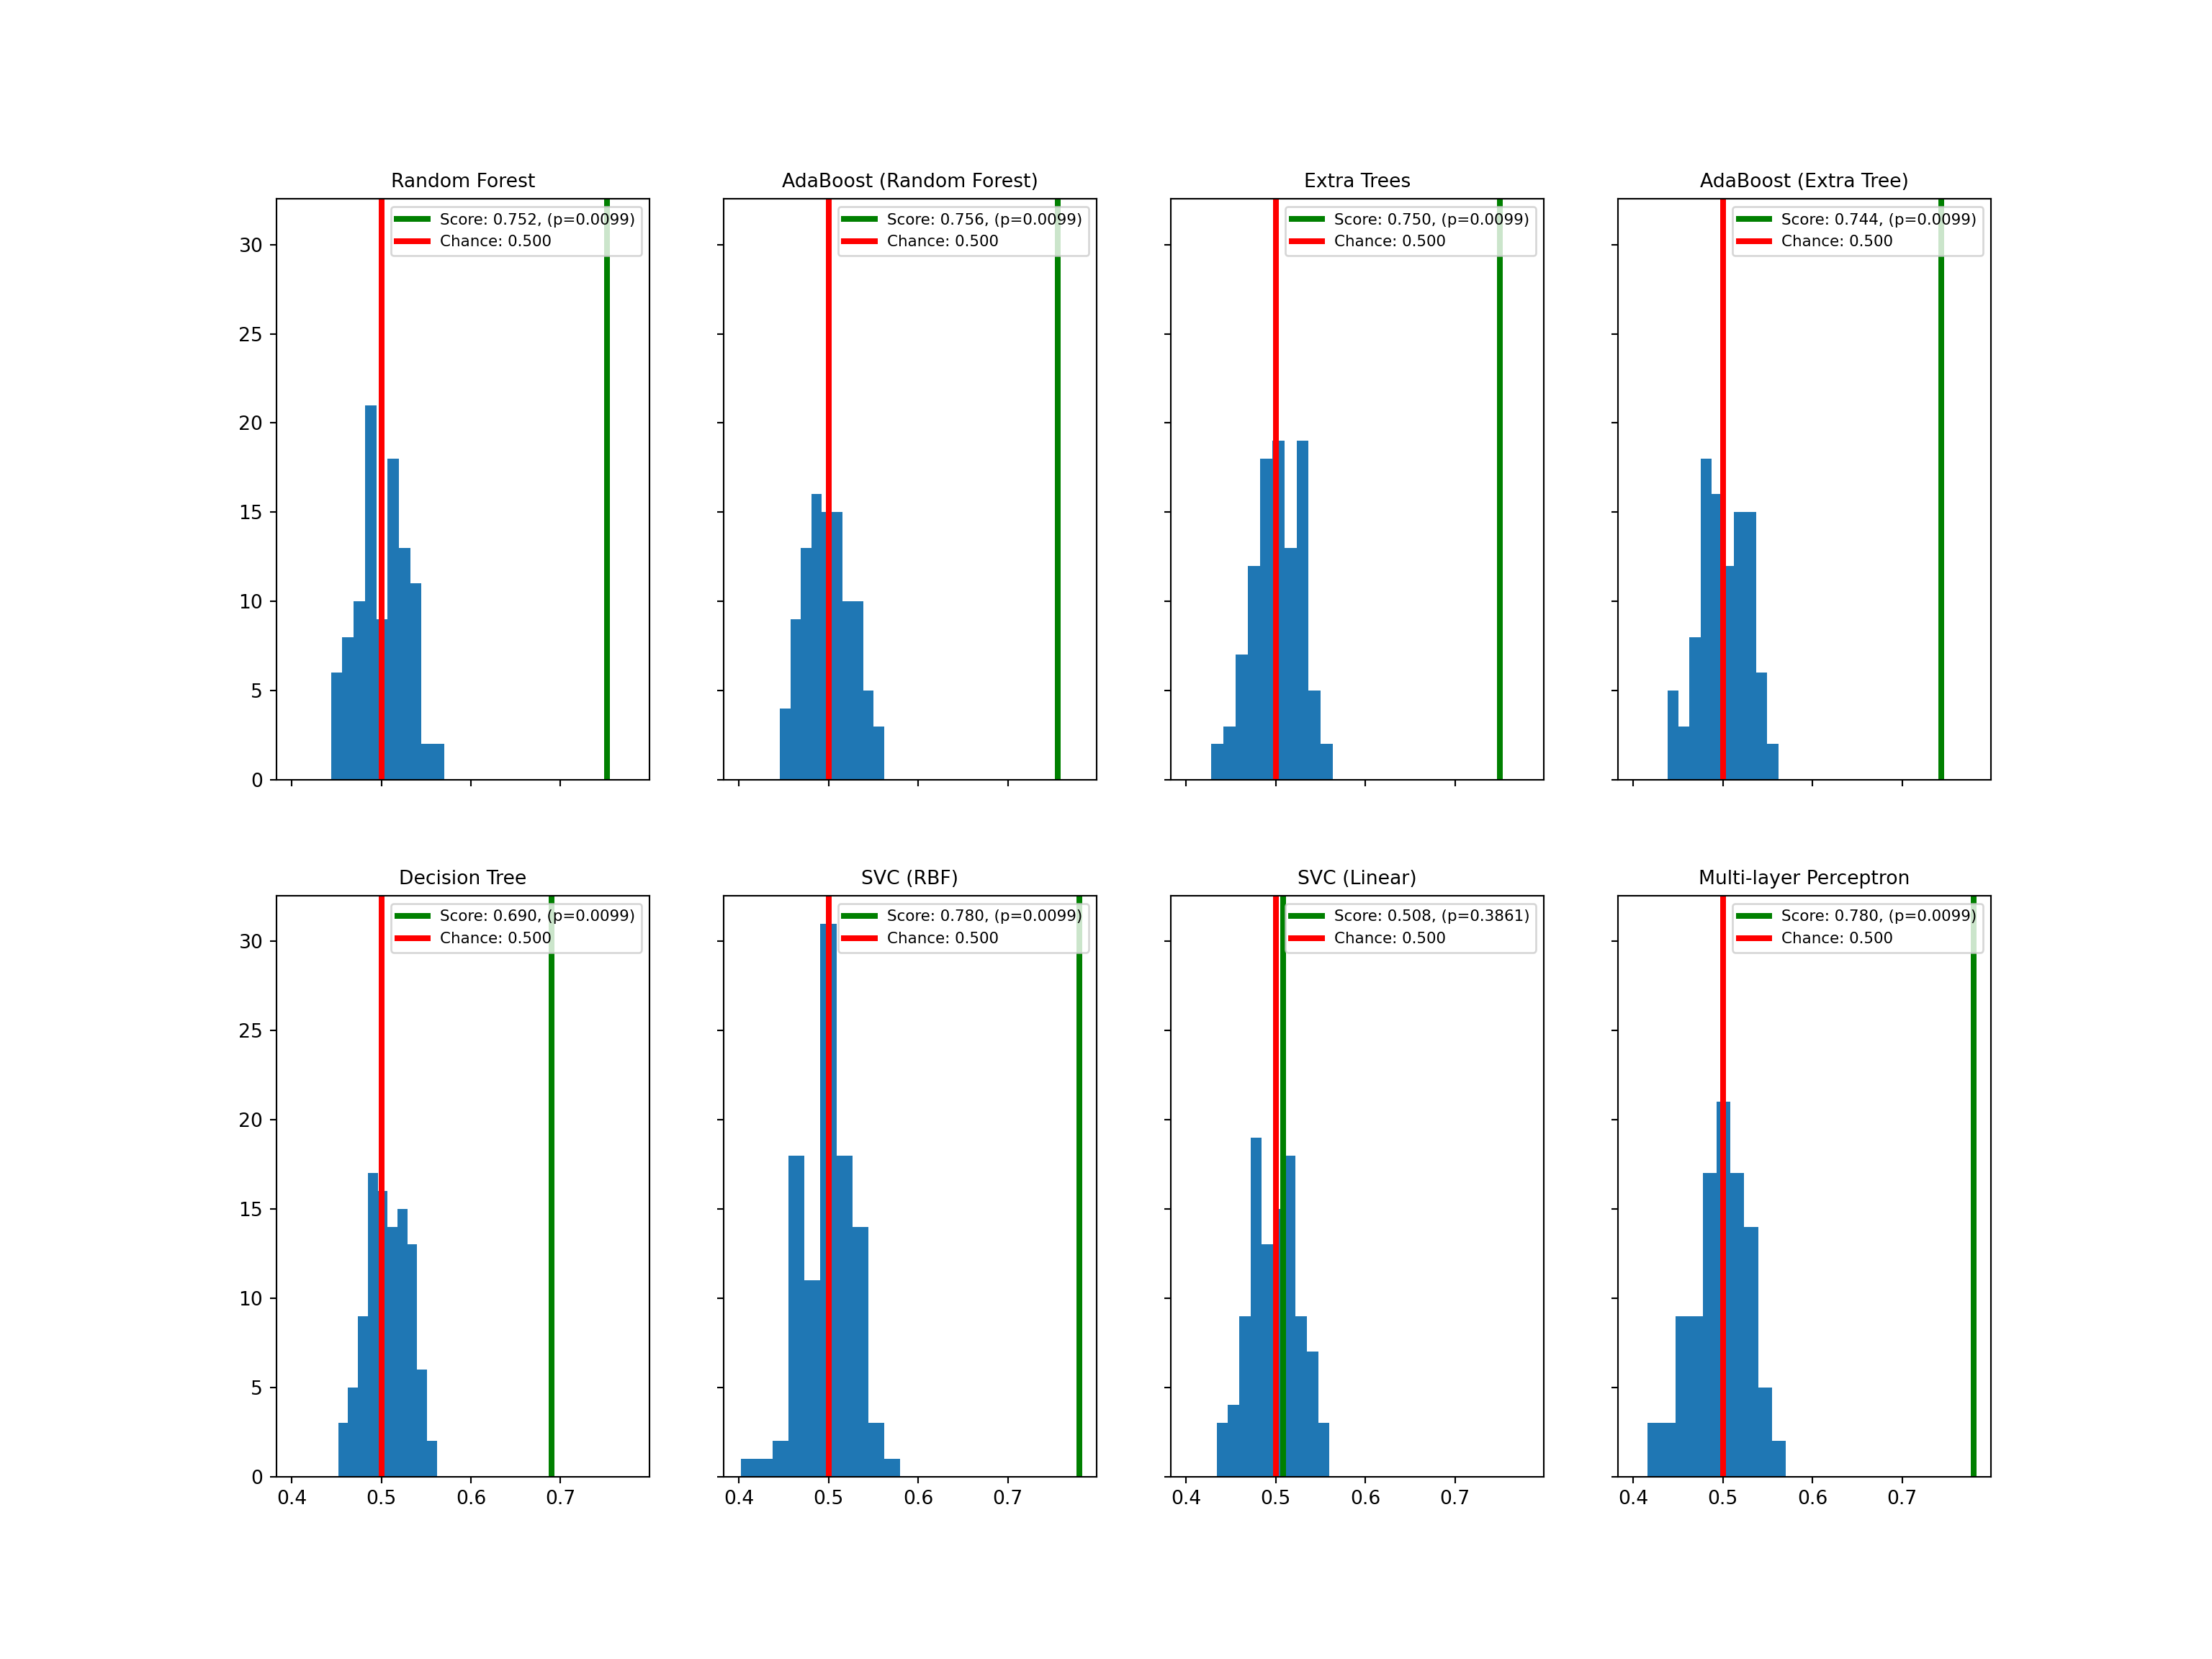

Apart from SVC (linear), all classifiers show satisfactory separation of
the permutation test (blue distribution with red mean value) from the
data score (green line). Apart from SVC (linear), the p-values are below
0.01.

Here is a [Scikit-learn example using permutations with the Iris
data](https://scikit-learn.org/stable/auto_examples/model_selection/plot_permutation_tests_for_classification.html#sphx-glr-auto-examples-model-selection-plot-permutation-tests-for-classification-py).

## Confusion Matrix

Another useful method to evaluate a model and demonstrate its integrity
is to produce a [confusion
matrix](https://en.wikipedia.org/wiki/Confusion_matrix). The matrix
demonstrates the number of correctly predicted labels against the
incorrect ones. As such it can, however, only be used for classification
problems with two labels.

Scikit-learn provides a [function to create a confusion
matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).
Here is an expanded function to simplify the visualisation of this
matrix.

``` python
def plot_confusion_matrix(y_test, y_pred, classes, normalize=False, ax=None):
    """
    This function prints and plots the confusion matrix.
    y_test (array)
    y_pred (array)
    classes (array)
    normalize (bool) Normalize the results (True), or show them as integer numbers (False).
    ax Visualization axis.
    The function is an adaptation of a SciKit Learn example.
    """

    from itertools import product
    from numpy import asarray, newaxis
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test,y_pred)
    n_classes = len(classes)

    if normalize:
        cm = asarray(cm).astype('float32') /cm.sum(axis=1)[:, newaxis]

    if not ax:
        from matplotlib.pyplot import subplots, show
        fig, ax = subplots()

    ticks = range(n_classes)
    ax.imshow(cm, interpolation='nearest', cmap='Blues')
    ax.set_xticks(ticks)
    ax.set_xticklabels(classes, rotation=90)
    ax.set_yticks(ticks)
    ax.set_yticklabels(classes)
    fmt = '.2f' if normalize else 'd'
    thresh = 3*cm.max() / 4
    cm_dim = cm.shape

    # Matrix indices:
    indices_a = range(cm_dim[0])
    indices_b = range(cm_dim[1])
    # Cartesian product of matrix indices:
    indices = product(indices_a, indices_b)
    fmt = '.2f' if normalize else 'd'

    for ind_a, ind_b in indices:
      label = format(cm[ind_a, ind_b], fmt)
      color = "white" if cm[ind_a, ind_b] > thresh else "black"
      ax.text(ind_b, ind_a, label, ha="center", color=color)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

    return ax
```

``` python
class_names = ('False (0)', 'True (1)')

fig, axes = subplots(figsize=(17, 12), ncols=4, nrows=2, sharey=True, sharex=True)


for ax, (name, clf) in zip(axes.ravel(), classifiers.items()):

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True, ax=ax)

    ax.set_title(name, fontsize=10);


show()
```

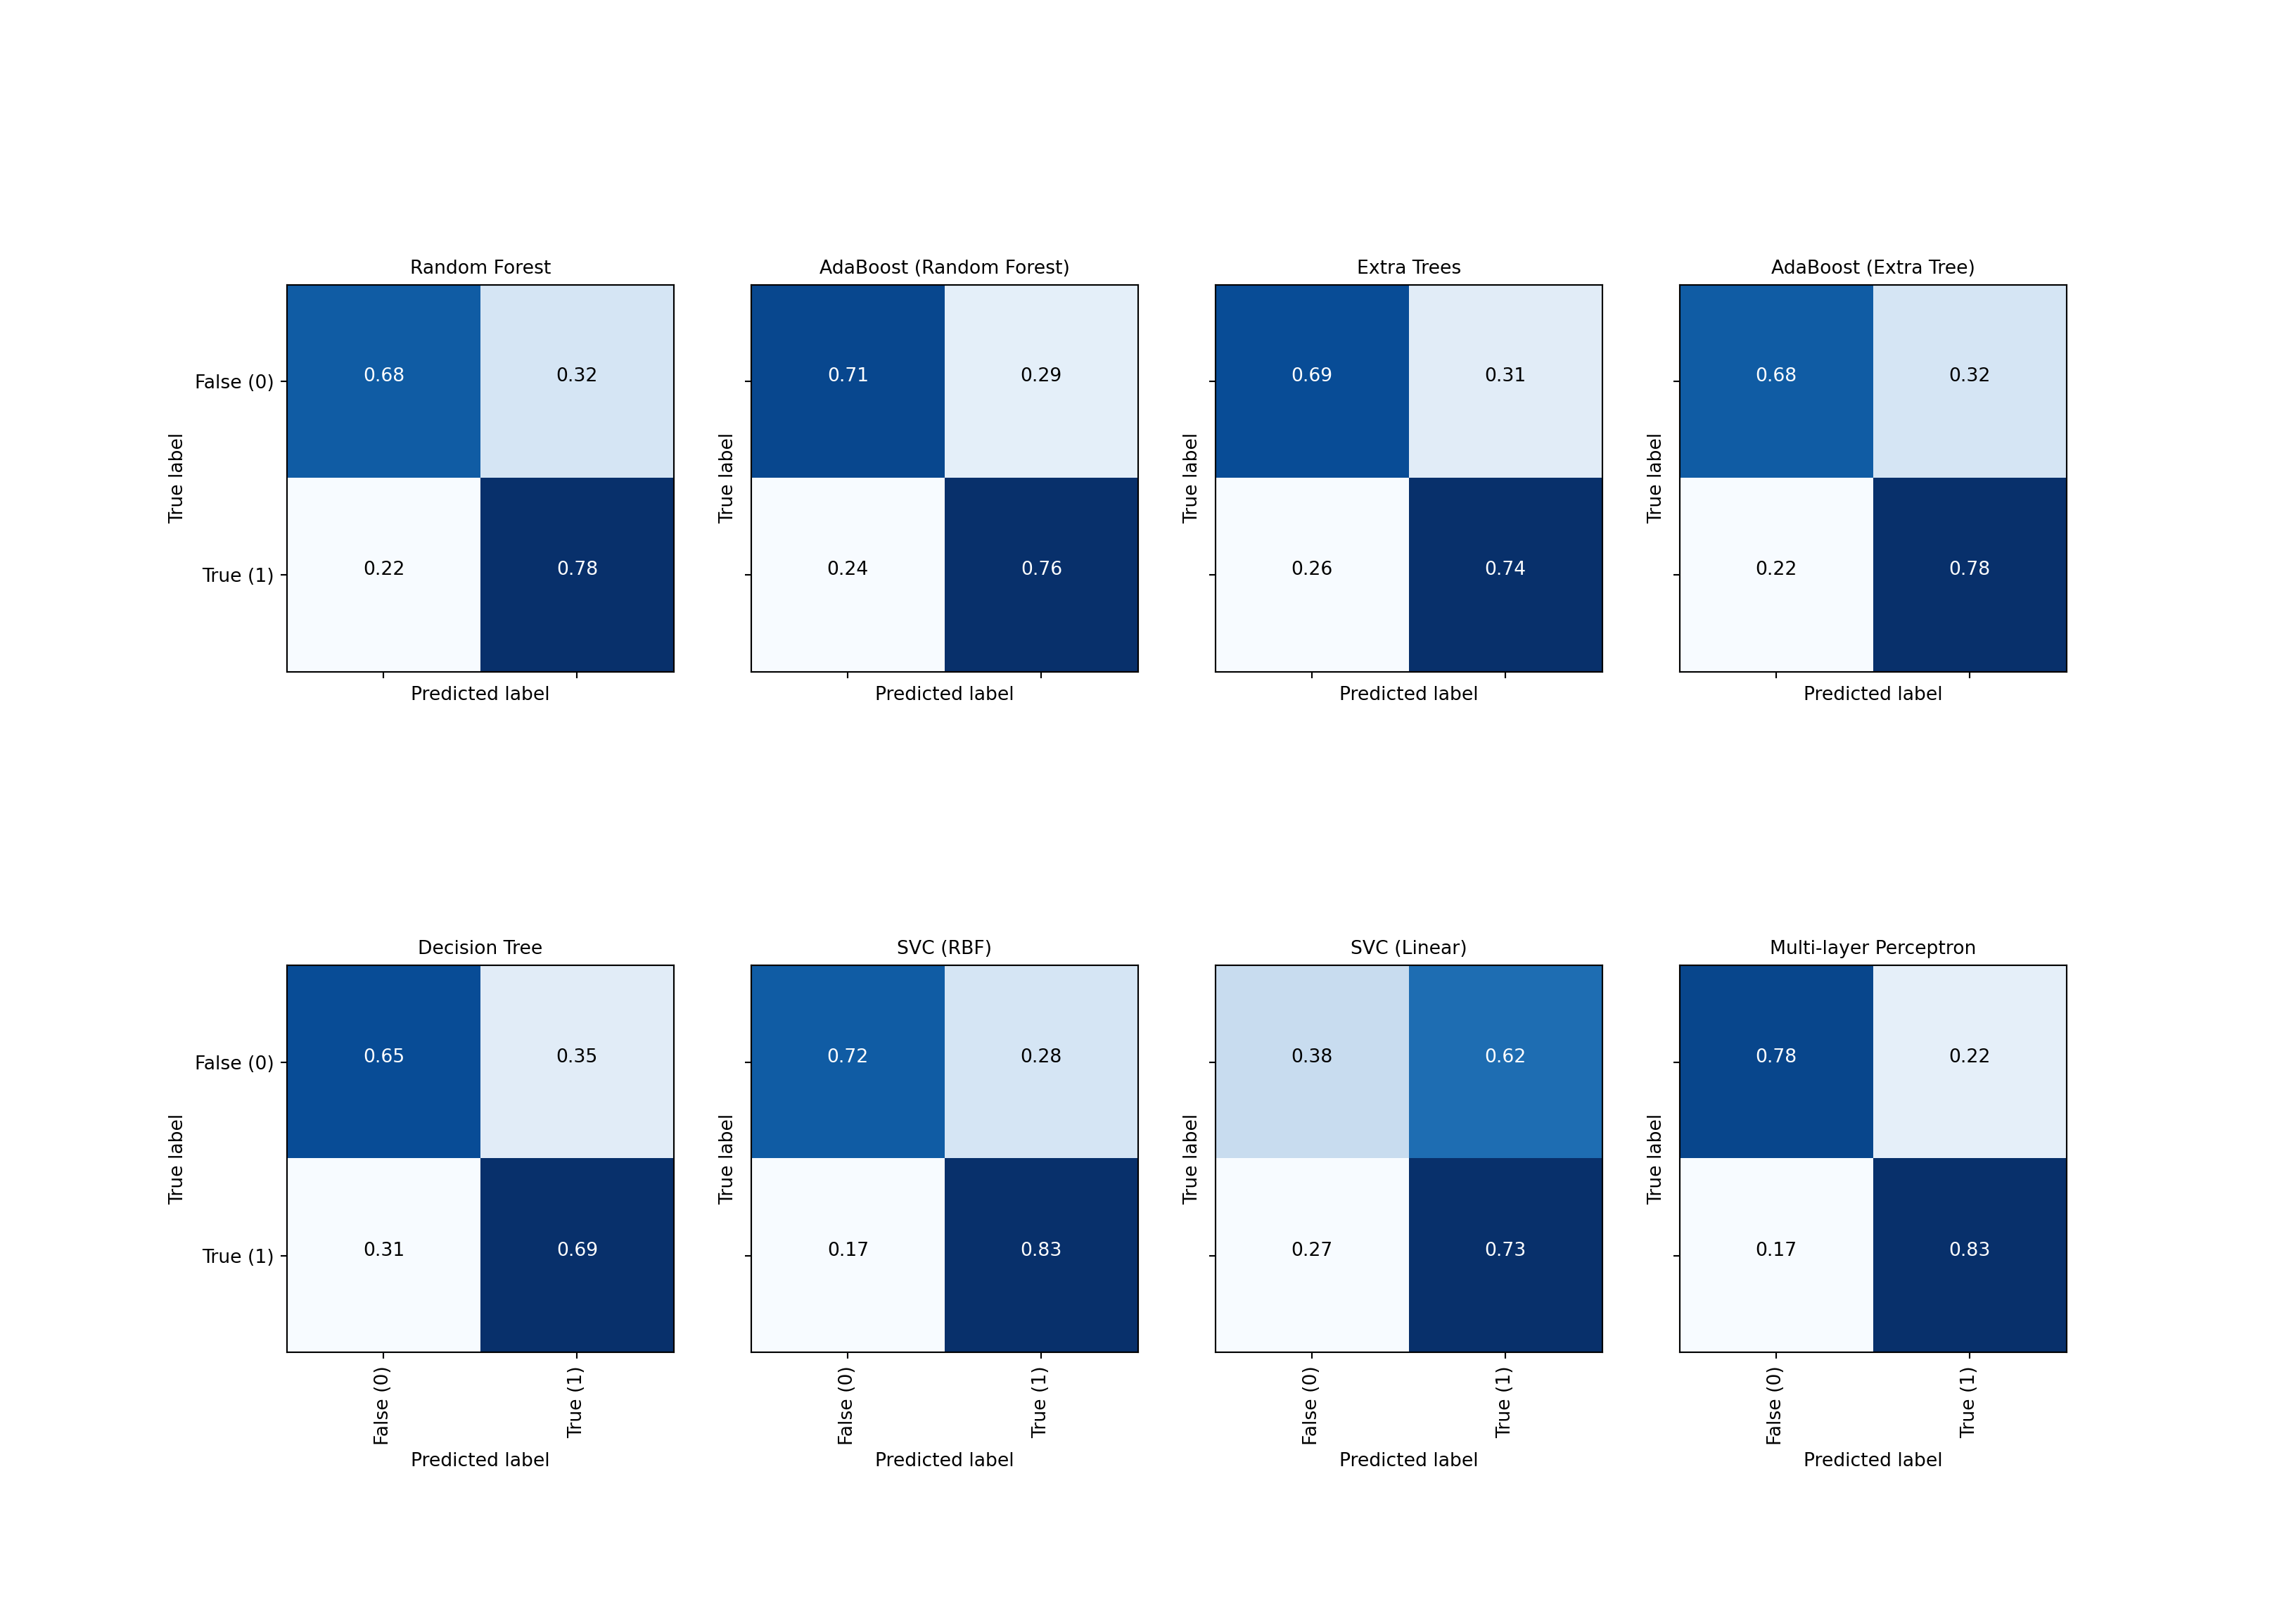

Ideally, the diagonal fields are both white and the off-diagonal fields
maximally dark.

## Further Refinements

Once we decide what algorithm to use, we start by training that
algorithm with its default settings and evaluate the results. If not
satisfied, we can make further adjustments to the **hyper-parameters**
of the algorithm to improve the results. As always in machine learning,
it is of great importance that we avoid overfitting, i.e. maintain the
generalisability of the model whilst improving its performance.

We start by creating a classification problem with 3 features and 2
labels using the `make_classification` function. Data are now displayed
in pseudo-3D.

``` python
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=500,
    n_features=3,
    n_classes=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_clusters_per_class=2,
    class_sep=.7,
    scale=3,
    random_state=RANDOM_STATE
)

fig, ax = subplots()

ax.hist(X);
ax.set_xlabel('Value')
ax.set_ylabel('Count')

show()
```

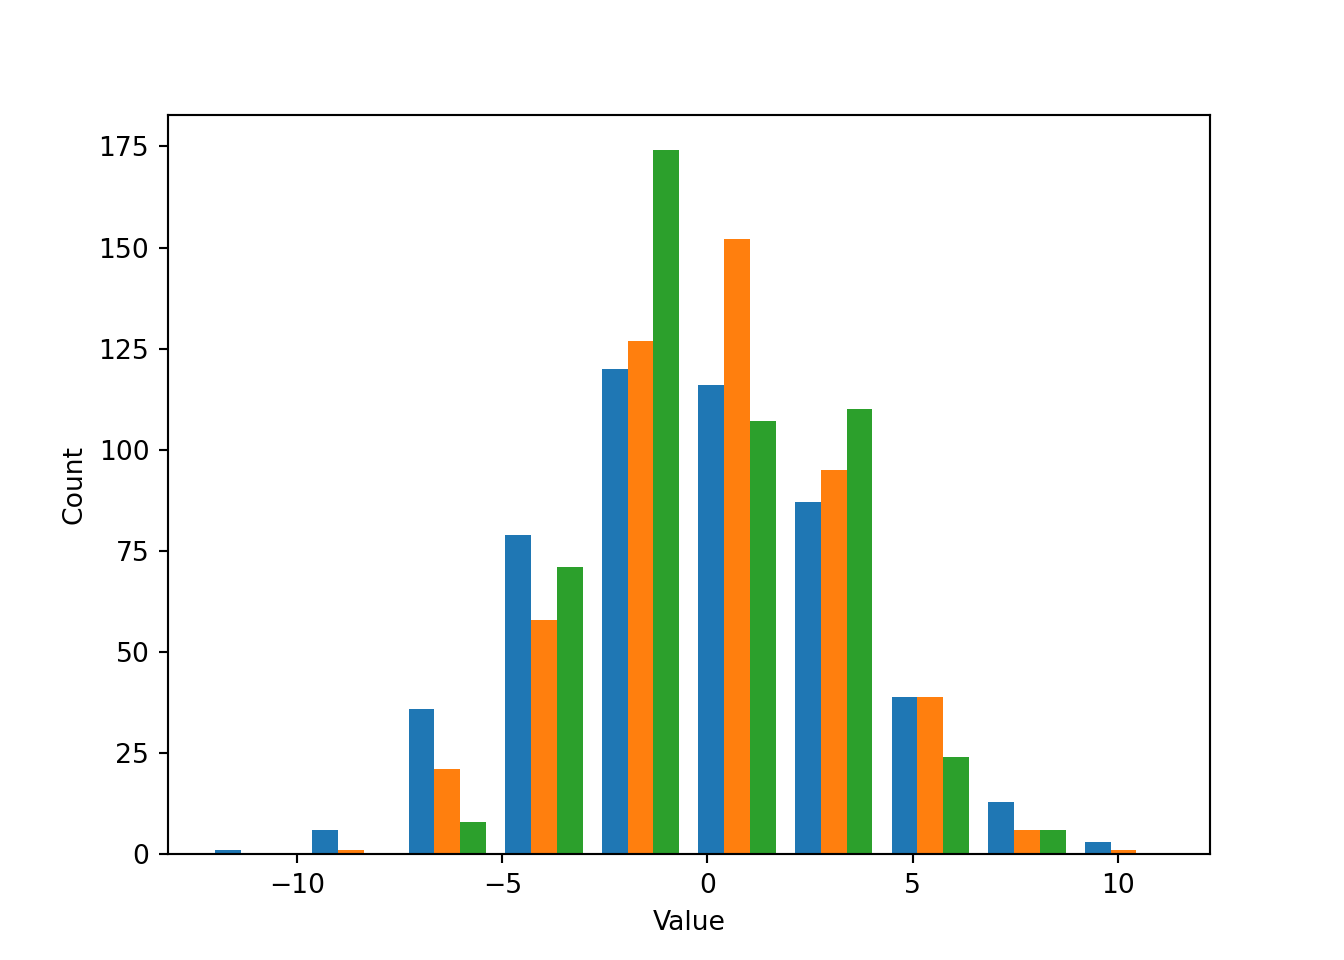

``` python
from mpl_toolkits.mplot3d import Axes3D

fig, ax = subplots(figsize=(10, 8), subplot_kw=dict(projection='3d'))

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, s=5, cmap='bwr');
show()
```

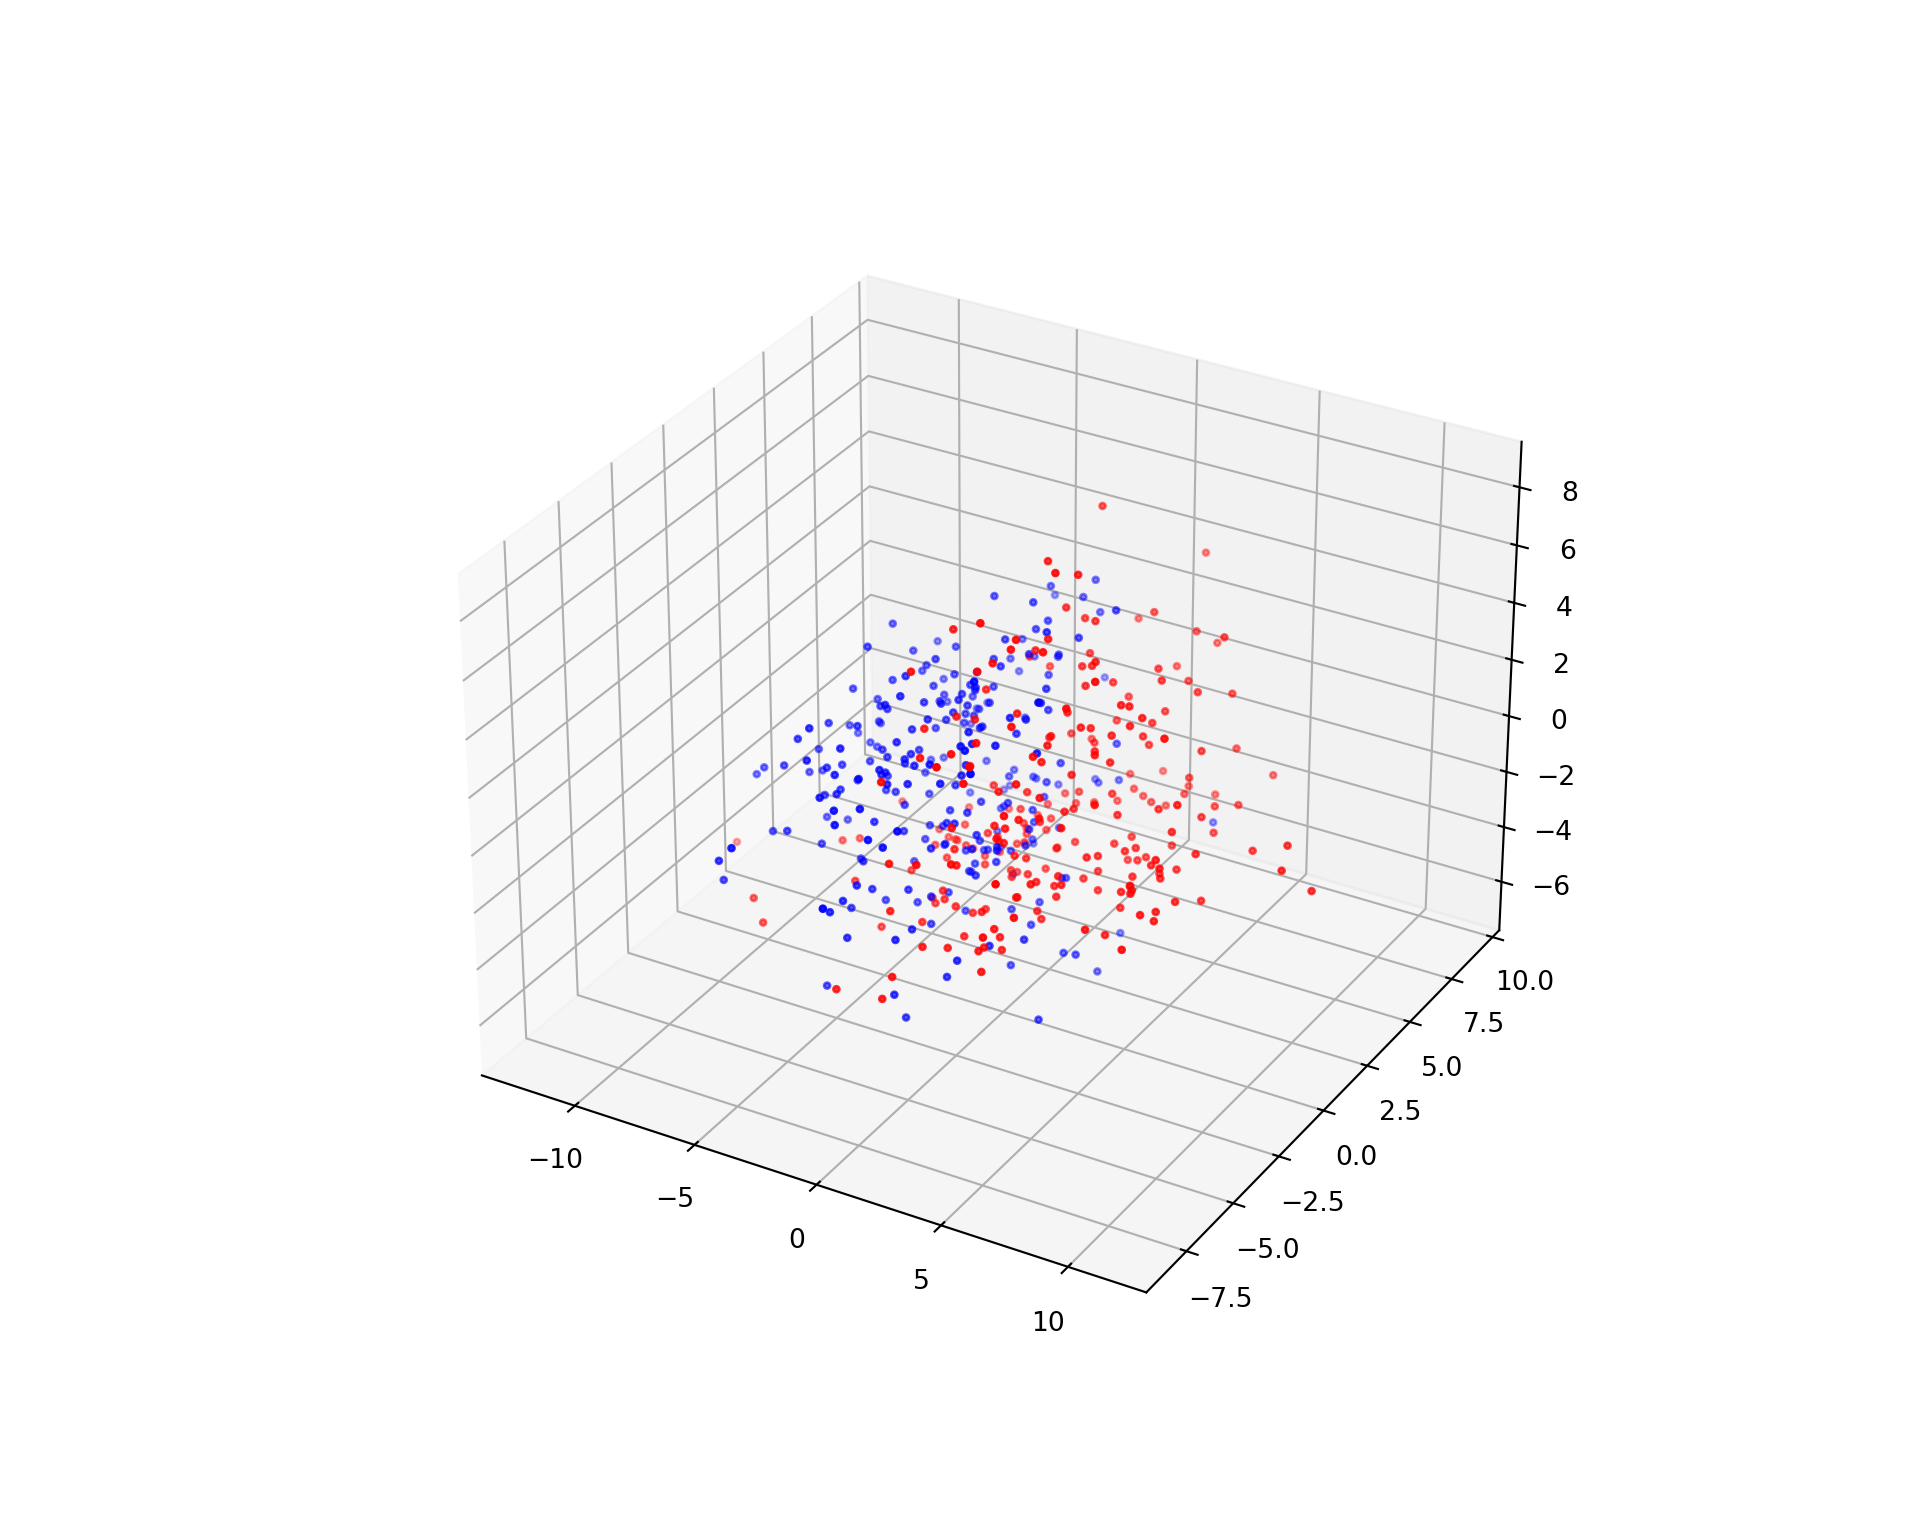

``` python
fig, axes = subplots(figsize=(12, 3), ncols=3, sharex=True, sharey=True)

axes[0].scatter(X[:, 0], X[:, 1], c=y, s=2, cmap='bwr')
axes[1].scatter(X[:, 0], X[:, 2], c=y, s=2, cmap='bwr')
axes[2].scatter(X[:, 1], X[:, 2], c=y, s=2, cmap='bwr');

show()
```

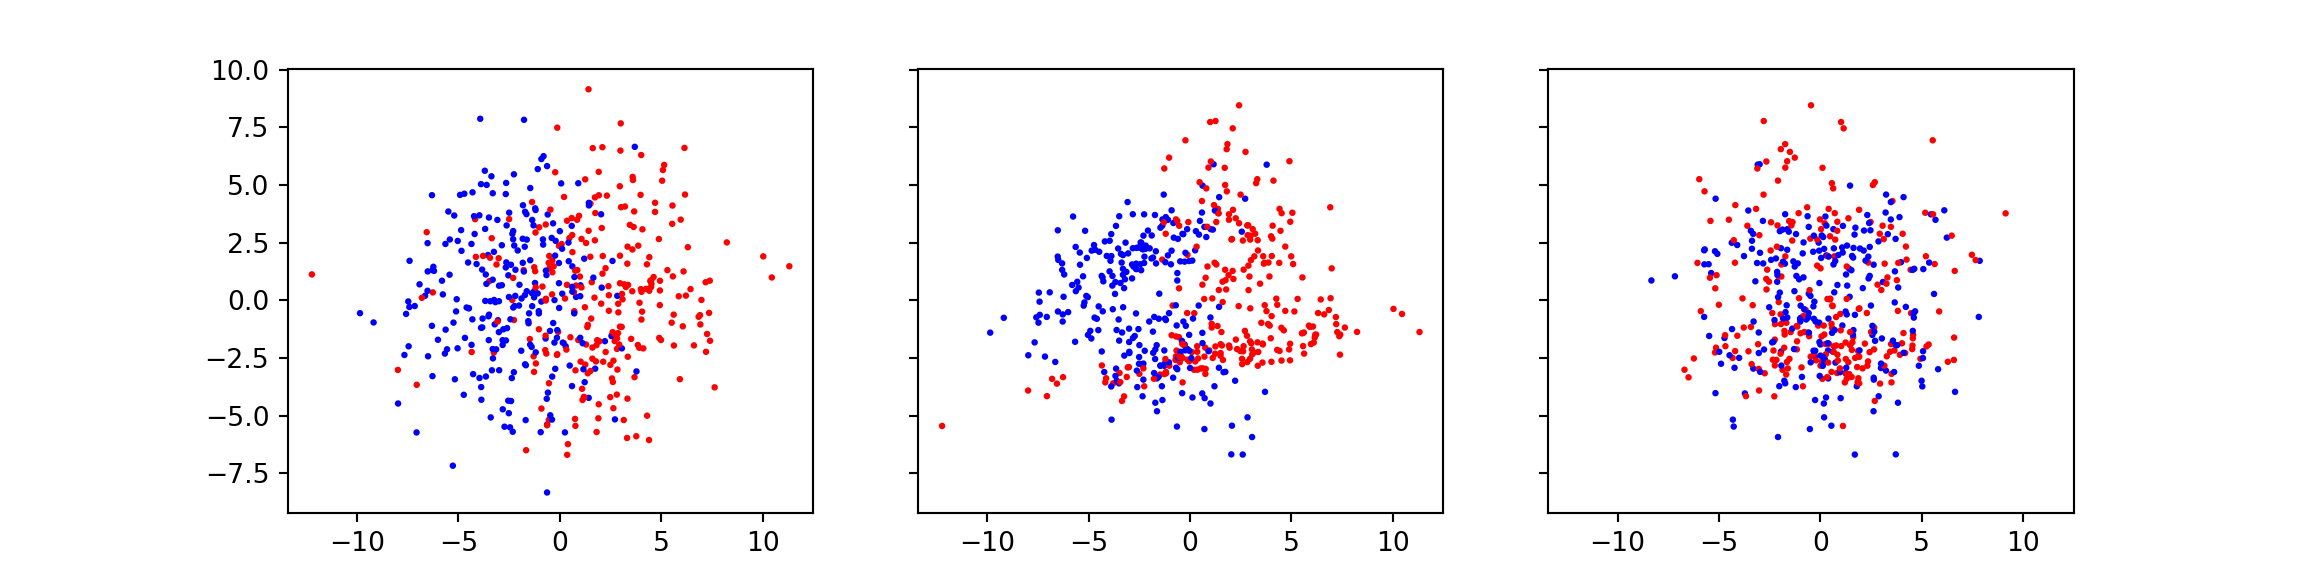

## Note

**Code**: Note the setting up of 3D axis. Some examples with code to
learn 3D plotting are [provided in these
tutorials](https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html).

We can now go ahead and use our classifier dictionary – which contains
the classifiers with their default settings – to train and evaluate the
models. We use the train-test split to evaluate the performance.

``` python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.8, random_state=RANDOM_STATE, shuffle=True)

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print('{:<30} Score: {:.2f}'.format(name, score))
```

    MLPClassifier(max_iter=5000, random_state=111)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

MLPClassifier

<a
href="https://scikit-learn.org/1.6/modules/generated/sklearn.neural_network.MLPClassifier.html"
class="sk-estimator-doc-link fitted" rel="noreferrer"
target="_blank">?<span>Documentation for MLPClassifier</span></a><span class="sk-estimator-doc-link fitted">iFitted</span>

    MLPClassifier(max_iter=5000, random_state=111)

### **Normalisation**

Depending on the nature of the data, it might be beneficial to normalise
the data before fitting a classifier. This is widely done in machine
learning but needs thought in each case.

Normalisation can be done in various ways. One common way to normalise
data is to require that they have mean 0 and variance 1. This is used
for example, when calculating the Pearson correlation coefficient.
Another popular way in machine learning is to normalise data to
Euclidean norm 1. For a data point in an m-dimensional feature space (m
is the number of features), the Euclidean norm of a single point (one
sample or row) is normalised such that the distance of the point from
the origin is 1.

Let us first see an example: some data points are spread between 1 and
4.

``` python
from sklearn.preprocessing import Normalizer

some_data = array([[1, 4], [3, 1], [4, 4], [2, 3]])

norm_skl         = Normalizer()
some_data_normed = norm_skl.fit_transform(some_data)

print('Normalised data:', '\n', some_data_normed)

from numpy import amax

fig, ax = subplots(nrows=1, ncols=2)

scaling = amax(some_data)*1.1

ax[0].scatter(some_data[:, 0], some_data[:, 1])
ax[0].set_xlim(0, scaling)
ax[0].set_ylim(0, scaling)
ax[0].set_xlabel('Some data')

ax[1].scatter(some_data_normed[:, 0], some_data_normed[:, 1], c='r')
ax[1].set_xlim(0, scaling)
ax[1].set_ylim(0, scaling);
ax[1].set_xlabel('Normalised data')

show()
```

    Normalised data: 
     [[0.24253563 0.9701425 ]
     [0.9486833  0.31622777]
     [0.70710678 0.70710678]
     [0.5547002  0.83205029]]
    (0.0, 4.4)
    (0.0, 4.4)
    (0.0, 4.4)

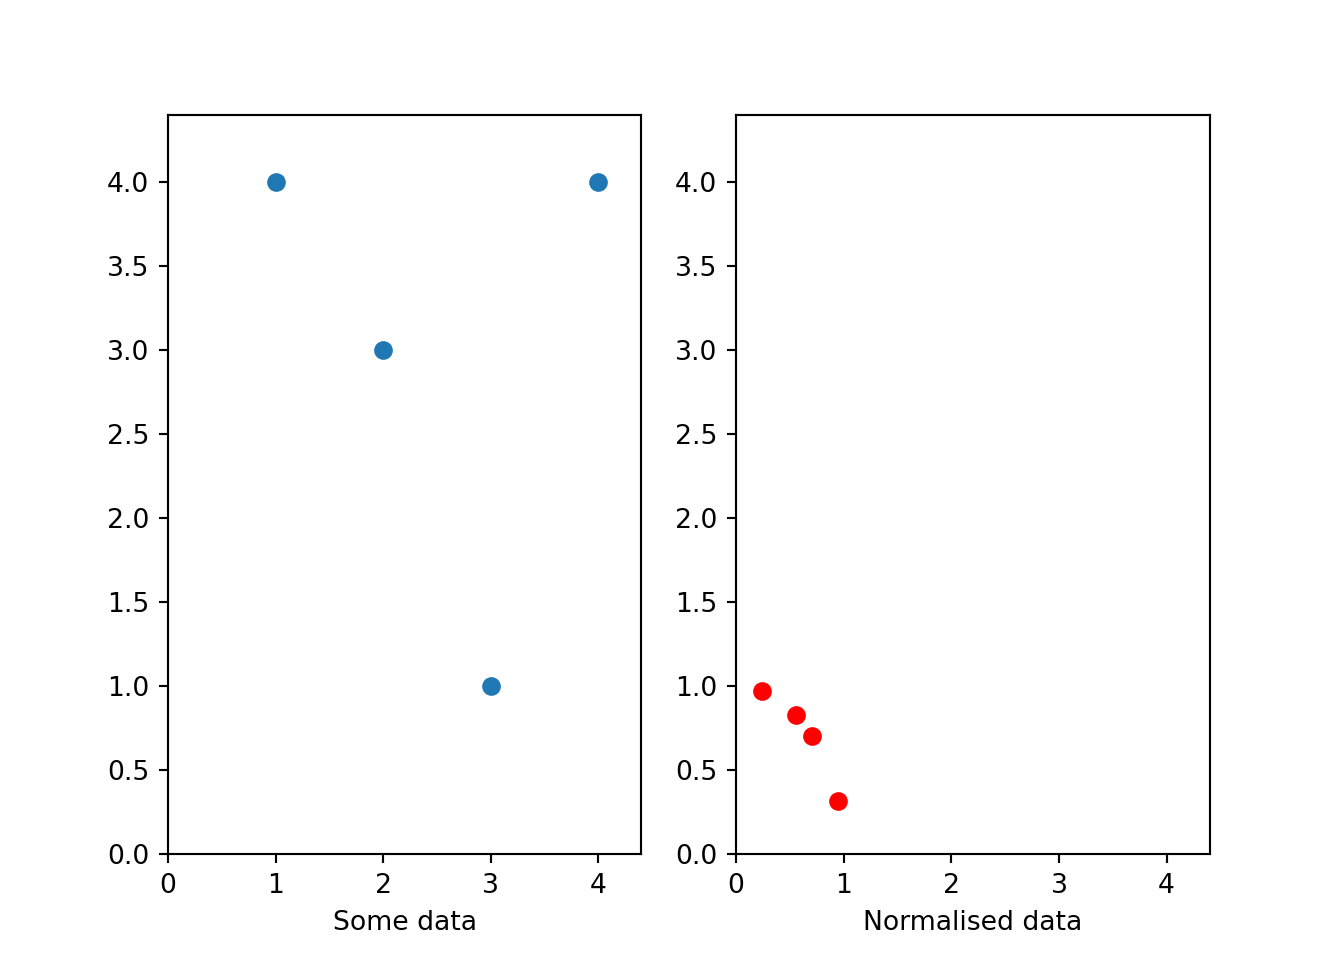

Effectively, all normalised data are positioned on a circle around the
origin with radius 1. Depending on correlations existing between the
features this leads to different distortions of the original data.

Let us now apply this normalisation to our artificial data set.

``` python
norm = Normalizer()

X_normed = norm.fit_transform(X)

fig, ax = subplots(figsize=(8, 8), subplot_kw=dict(projection='3d'))

ax.scatter(X_normed[:, 0], X_normed[:, 1], X_normed[:, 2], c=y, s=5, cmap='bwr');
ax.view_init(30, 50);
show()
```

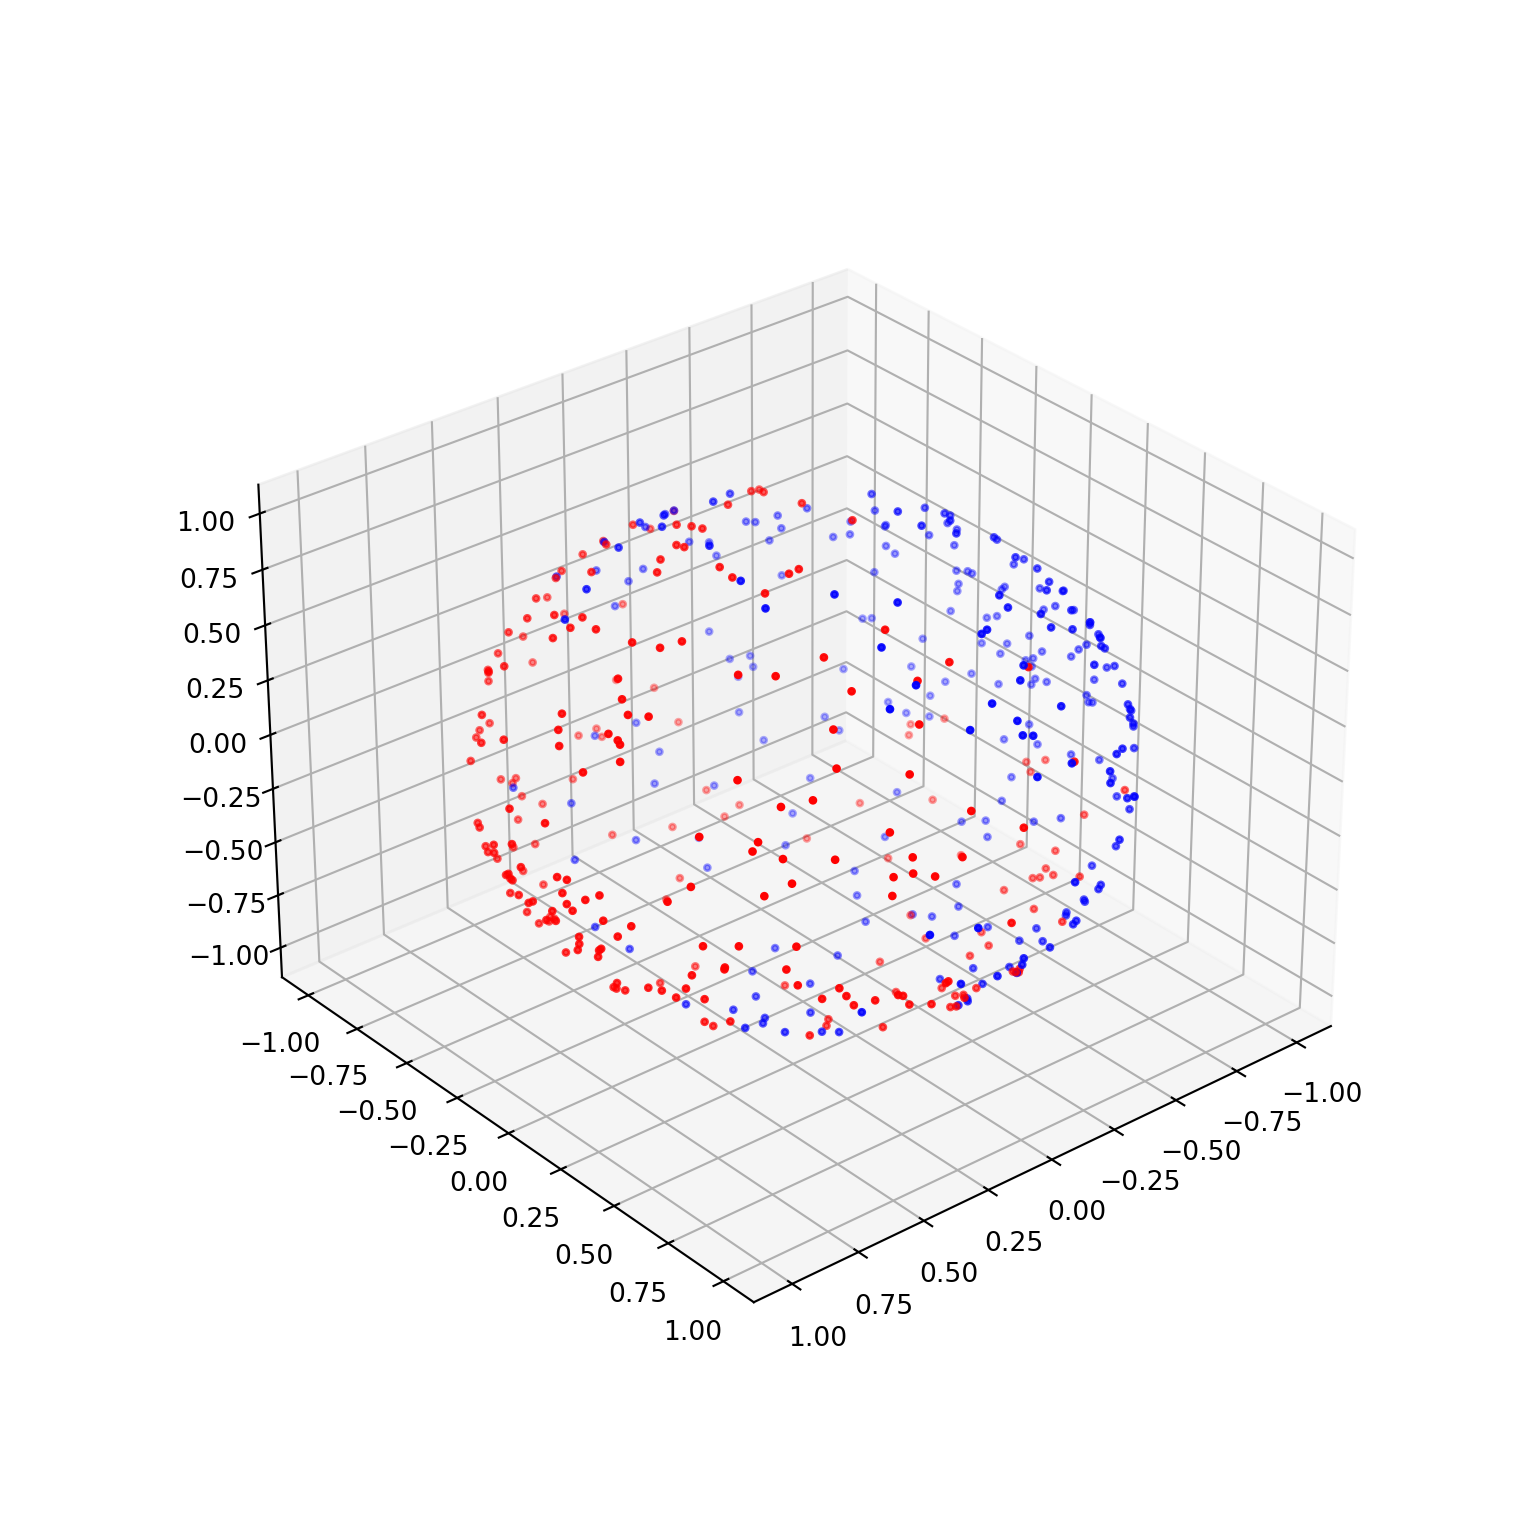

``` python
fig, axes = subplots(figsize=(10, 3), ncols=3, sharex=True, sharey=True)

axes[0].scatter(X_normed[:, 0], X_normed[:, 1], c=y, s=2, cmap='bwr')
axes[1].scatter(X_normed[:, 0], X_normed[:, 2], c=y, s=2, cmap='bwr')
axes[2].scatter(X_normed[:, 1], X_normed[:, 2], c=y, s=2, cmap='bwr');

show()
```

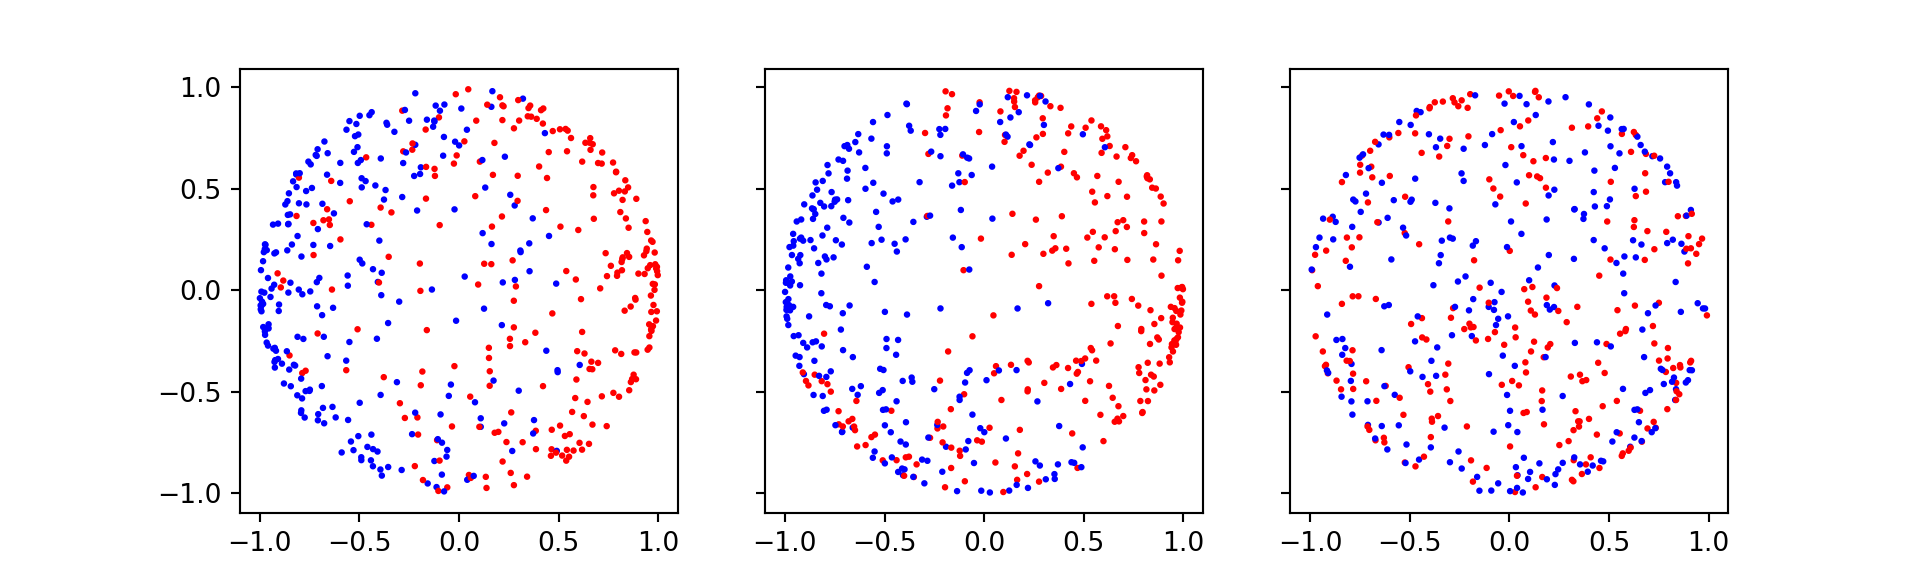

The normalisation projects the data on the unit sphere. And now we can
do the training on the normalised data:

``` python
X_train, X_test, y_train, y_test = train_test_split(X_normed, y, test_size=.8, random_state=RANDOM_STATE, shuffle=True)

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print('{:<30} Score: {:.2f}'.format(name, score))
```

    MLPClassifier(max_iter=5000, random_state=111)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

MLPClassifier

<a
href="https://scikit-learn.org/1.6/modules/generated/sklearn.neural_network.MLPClassifier.html"
class="sk-estimator-doc-link fitted" rel="noreferrer"
target="_blank">?<span>Documentation for MLPClassifier</span></a><span class="sk-estimator-doc-link fitted">iFitted</span>

    MLPClassifier(max_iter=5000, random_state=111)

Due to the homogeneous nature of the artificial data, the results here
are comparable for the data and their normalised version. But this may
change when using data with inconsistent distributions of the columns.
For an example, see the [breastcancer
data](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)
used in the assignment.

### **Hyperparameter Tuning**

Once we decide on what algorithm to use, we often start by training that
algorithm with its default settings and evaluate the results. If not
satisfied, we can go further and make adjustments to the
hyper-parameters of the algorithm to improve the results. As always in
machine learning, it is of great importance that we maintain the
generalisability of our model whilst improving its performance. We use
the data from the above classification problem with 3 features and 2
labels.

### **Progressive Adjustment**

After we have compared original and normalised data and obtained their
scores, we now can try to progressively improve the performance of the
algorithms. Each classification algorithm uses a unique set of
hyper-parameters, the details of which are outlined in their respective
documentations on `Scikit-learn`. The optimum parameters are those that
produce the best fit whilst maintaining the generalisability of a model.
One way to obtain the optimum settings is to test different parameters
and compare the model scores over and over again. However, as outlined
before, by doing so we may risk *leaking* our test data, and end up
over-fitting the model to the test data. (We also learned above that we
can use different cross-validators to address this problem.)

`Scikit-learn` provides us with a tool entitled `GridSearchCV` to define
different values for different parameters. It then applies different
combinations of different parameters to the model and evaluates the
outcome using data that it generates from a cross-validation algorithm.
Once finished, it provides us with the parameters that produce the best
score for our data. This is referred to as progressive adjustment.

Note that this process can be lengthy, and may need to be refined
several times, so it is a good idea to set `n_jobs=-1` and thereby take
advantage of different CPU core on the computer. For demonstration, we
use SVC(rbf) as a classifier. With certain problems, its training may
lead to poor results with the default parameters.

``` python
clf = SVC(kernel='rbf', C=1, gamma=100, tol=0.0001)

clf.fit(X_train, y_train)

score = clf.score(X_test, y_test)

print('{:<30} Score: {:.2f}'.format('SVC (RBF)', score))
```

    SVC(C=1, gamma=100, tol=0.0001)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

SVC

<a
href="https://scikit-learn.org/1.6/modules/generated/sklearn.svm.SVC.html"
class="sk-estimator-doc-link fitted" rel="noreferrer"
target="_blank">?<span>Documentation for SVC</span></a><span class="sk-estimator-doc-link fitted">iFitted</span>

    SVC(C=1, gamma=100, tol=0.0001)

    SVC (RBF)                      Score: 0.68

Progressive adjustment of some of the parameters may lead to an improved
model.

[Check the
documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)
for the meaning and the default values of regularisation parameters `C`,
kernel coeffcient `gamma`, and tolerance setting `tol`.

``` python
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

param_grid = dict(C=[1e-4, 1e-3, 1e-2, 1e-1, 1, 10],
                  gamma=[100, 1000, 10000, 100000],
                  tol=[1e-4, 1e-3, 1e-2, 1e-1])

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=RANDOM_STATE)
clf = SVC(kernel='rbf', random_state=RANDOM_STATE)

grid = GridSearchCV(clf, param_grid=param_grid, cv=cv, n_jobs=1)

grid.fit(X, y)

print("ORIGINAL: Best parameters {}   Score: {:.2f}".format(grid.best_params_, grid.best_score_))

grid.fit(X_normed, y)

print("NORMED:   Best parameters {}    Score {:.2f}".format(grid.best_params_, grid.best_score_))
```

    ORIGINAL: Best parameters {'C': 0.0001, 'gamma': 1000, 'tol': 0.0001}   Score: 0.65

    NORMED:   Best parameters {'C': 1, 'gamma': 100, 'tol': 0.0001}    Score 0.75

In this case, while both optimised scores are better than the original
one, there is also a notable improvement when using the normalised data.
Let us similarly check the Random Forest classifier, first with default
settings.

``` python
clf = RandomForestClassifier(random_state=RANDOM_STATE)

clf.fit(X_train, y_train)

score = clf.score(X_test, y_test)

print('{:<30} Score: {:.2f}'.format('Random Forest', score))
```

    RandomForestClassifier(random_state=111)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

RandomForestClassifier

<a
href="https://scikit-learn.org/1.6/modules/generated/sklearn.ensemble.RandomForestClassifier.html"
class="sk-estimator-doc-link fitted" rel="noreferrer"
target="_blank">?<span>Documentation for
RandomForestClassifier</span></a><span class="sk-estimator-doc-link fitted">iFitted</span>

    RandomForestClassifier(random_state=111)

    Random Forest                  Score: 0.77

And now a grid over [some of its
parameters](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

``` python
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

param_grid = dict(
    n_estimators=[5, 10, 15, 20, 50, 60, 70],
    max_features=[None, 'auto', 'sqrt', 'log2'],
    min_samples_split=[2, 3, 4, 5],
    max_depth=[1, 2, 3, 4]
)

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=RANDOM_STATE)

clf = RandomForestClassifier(random_state=RANDOM_STATE)

grid = GridSearchCV(clf, param_grid=param_grid, cv=cv, n_jobs=1)

grid.fit(X, y)

print("ORIGINAL: Best parameters {}   Score: {:.2f}".format(grid.best_params_, grid.best_score_))

grid.fit(X_normed, y)

print("NORMED:   Best parameters {}    Score {:.2f}".format(grid.best_params_, grid.best_score_))
```

    ORIGINAL: Best parameters {'max_depth': 4, 'max_features': None, 'min_samples_split': 2, 'n_estimators': 15}   Score: 0.84

    NORMED:   Best parameters {'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 10}    Score 0.81

In this case, our (arbitrary) search did not lead to a substantial
improvement. This shows that the default settings are in fact a good
starting point.

### **Leakage in progressive adjustments**

We have already highlighted unequivocally the importance of not exposing
our test data to our model during the training process; but where does
training end? After deciding on an algorithm, we often attempt to
improve its performance by adjusting its hyper-parameters as done above.
We make these adjustments on our model repeatedly until we obtain
optimal results in a specific metric that scores the performances based
exclusively on our test data. In such cases, we risk *leaking* our test
data and thereby over-fit our model to the test data through progressive
adjustments. This means that the evaluation metrics on the
generalisability of our model are no longer reliable.

One way to address this problem is to split our original data into 3
different datasets: training, test, and validation. Whilst this is a
valid approach that may be used in specific circumstances, it might also
introduce new problems, e.g. after splitting the available data into 3
subsets, there might just not be enough data to train the classifier
properly.

See for example the discussion in part 2 of this [paper on predictive
modelling for brain
stimulation](https://www.brainstimjrnl.com/article/S1935-861X(21)00236-9/fulltext).
The above leaking is there referred to as “snooping”.

  

## Exercises

#### End of chapter Exercises

As a suggestion, take the [breast cancer
dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer).

1.  Using all features create a summary boxplot to see the medians and
    distributions of the features.

2.  Train the above introduced classifiers using the train_test split to
    generate testing and training data and pick a small training set of
    e.g. 10% to make the classification task difficult. Obtain the
    recall scores to compare classifiers.

3.  Plot the confusion matrix for each case.

4.  Do a permutation test with default settings to get the p-values to
    reject the null hypothesis that the scores are compatible with
    random predictions. If it takes too long, reduce `n_permutations`.

5.  Repeat the workflow with normalised data and compare the results.

6.  Perform a hyperparameter tuning with the Random Forest classifier.
    For the optimal parameter settings, re-run the training and plot the
    feature importances to see the contributions of each feature to the
    outcome.

The breast cancer data can be imported from the `scikit-learn`.

``` python
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data.data
y = data.target
```

Feel free to try and do any other testing or plotting that you find
important. This assignment is not meant to get a correct answer. It
should help you to increase flexibility when facing a complex machine
learning problem.

## Solutions are provided after assignments are marked.

  

-   The function `permutation_test_score` evaluates the significance of
    a cross-validated score with permutations.
-   Confusion matrix demonstrates the number of correctly predicted
    labels against the incorrect ones.
-   Adjustment of hyper-parameters of the algorithms may improve the
    results.
-   `GridSearchCV` is a tool to simultaneously define different values
    of different parameters for optimisation.
-   Progressive adjustments may lead to model over-fitting and require a
    validation data set.

LS0tCnRpdGxlOiAiUmVmaW5lbWVudCIKdGVhY2hpbmc6IDEwCmV4ZXJjaXNlczogMgotLS0KClsqKkRvd25sb2FkIENoYXB0ZXIgbm90ZWJvb2sgKGlweW5iKSoqXShodHRwczovL2RyaXZlLnVzZXJjb250ZW50Lmdvb2dsZS5jb20vdS8xL3VjP2lkPTFjcXUxcHZGcjlyV0s5MkNVWlg3dTJiSTZXN05ZUnB4SyZleHBvcnQ9ZG93bmxvYWQpCgpbKipEb3dubG9hZCBDaGFwdGVyIFBERioqXShodHRwczovL2RyaXZlLnVzZXJjb250ZW50Lmdvb2dsZS5jb20vdS8xL3VjP2lkPTE5U3VGQ2FHbFF6MV80Y2MzbkVTS1RFYWRSMkJfd3RXMyZleHBvcnQ9ZG93bmxvYWQpCgpbPHNwYW4gc3R5bGU9ImNvbG9yOiByZ2IoMjU1LCAwLCAwKTsiPioqTWFuZGF0b3J5IExlc3NvbiBGZWVkYmFjayBTdXJ2ZXkqKjwvc3Bhbj5dKGh0dHBzOi8vZG9jcy5nb29nbGUuY29tL2Zvcm1zL2QvZS8xRkFJcFFMU2RyMGNhcEY3amxvSmhQSDNQa2kxQjNMWm9LT0cxNnBvT3B1Vko3U0wyTGt3TEhRQS92aWV3Zm9ybT9wbGk9MSkKCmBgYHtyIHNldHVwLCBpbmNsdWRlPUZBTFNFfQpsaWJyYXJ5KHJldGljdWxhdGUpCgojIFVuc2V0IFJFVElDVUxBVEVfUFlUSE9OIHRvIGF2b2lkIGNvbmZsaWN0cyB3aXRoIHByZWxvYWRlZCBlbnZpcm9ubWVudHMKU3lzLnVuc2V0ZW52KCJSRVRJQ1VMQVRFX1BZVEhPTiIpCgojIENoZWNrIGlmIHBhbmRvYyBpcyBhdmFpbGFibGUKaWYgKCFmaWxlLmV4aXN0cygiL29wdC9ob21lYnJldy9iaW4vcGFuZG9jIikpIHsKICBzdG9wKCJQYW5kb2MgaXMgbm90IGZvdW5kLiBQbGVhc2UgaW5zdGFsbCBQYW5kb2Mgb3IgdXBkYXRlIHRoZSBwYXRoLiIpCn0KCiMgRGV0ZWN0IHRoZSB0YXJnZXQgb3V0cHV0IGZvcm1hdApyZW5kZXJfdG9faXB5bmIgPC0gaWRlbnRpY2FsKGtuaXRyOjpvcHRzX2tuaXQkZ2V0KCJybWFya2Rvd24ucGFuZG9jLnRvIiksICJodG1sX25vdGVib29rIikKCiMgU2V0IHRoZSBQeXRob24gZW52aXJvbm1lbnQgZHluYW1pY2FsbHkKaWYgKHJlbmRlcl90b19pcHluYikgewogICMgVXNlIHRoZSBlbnZpcm9ubWVudCBvcHRpbWl6ZWQgZm9yIHJlbmRlcmluZyAuaXB5bmIKICB1c2VfdmlydHVhbGVudigiL1VzZXJzL0FkYW0vLnZpcnR1YWxlbnZzL3ItcmV0aWN1bGF0ZSIsIHJlcXVpcmVkID0gVFJVRSkKfSBlbHNlIHsKICAjIFVzZSB0aGUgZ2VuZXJhbC1wdXJwb3NlIFB5dGhvbiBlbnZpcm9ubWVudCBmb3IgZXhlY3V0aW5nIFB5dGhvbiBjb2RlCiAgdXNlX3B5dGhvbigiL1VzZXJzL0FkYW0vLnZpcnR1YWxlbnZzL3ItcmV0aWN1bGF0ZS9iaW4vcHl0aG9uMyIsIHJlcXVpcmVkID0gVFJVRSkKfQoKIyBEZWJ1Z2dpbmc6IFByaW50IHRoZSBhY3RpdmUgUHl0aG9uIGVudmlyb25tZW50CmNhdCgiQWN0aXZlIFB5dGhvbiBlbnZpcm9ubWVudDogIiwgU3lzLmdldGVudigiUkVUSUNVTEFURV9QWVRIT04iKSwgIlxuIikKCiMgT3V0cHV0IFB5dGhvbiBjb25maWd1cmF0aW9uIGZvciBkZWJ1Z2dpbmcKdHJ5Q2F0Y2goCiAgewogICAgcHlfY29uZmlnKCkKICB9LAogIGVycm9yID0gZnVuY3Rpb24oZSkgewogICAgY2F0KCJQeXRob24gY29uZmlndXJhdGlvbiBlcnJvcjogIiwgZSRtZXNzYWdlLCAiXG4iKQogIH0KKQoKIyBUZXN0IG51bXB5IGltcG9ydCBiZWZvcmUgcHJvY2VlZGluZwp0cnlDYXRjaCh7CiAgcHlfcnVuX3N0cmluZygiaW1wb3J0IG51bXB5IikKICBjYXQoIm51bXB5IGlzIGF2YWlsYWJsZS5cbiIpCn0sIGVycm9yID0gZnVuY3Rpb24oZSkgewogIGNhdCgiRXJyb3IgbG9hZGluZyBudW1weToiLCBlJG1lc3NhZ2UsICJcbiIpCn0pCgojIEVuc3VyZSBgLmlweW5iYCBmaWxlIGlzIGdlbmVyYXRlZAppZiAocmVuZGVyX3RvX2lweW5iKSB7CiAgIyBQYXRoIHNldHRpbmdzCiAgaW5wdXRfZmlsZSA8LSBrbml0cjo6Y3VycmVudF9pbnB1dCgpICMgR2V0IHRoZSBjdXJyZW50IC5SbWQgZmlsZSBiZWluZyBwcm9jZXNzZWQKICBpbnRlcm1lZGlhdGVfaHRtbCA8LSBmaWxlLnBhdGgoInNpdGUvYnVpbHQiLCBzdWIoIlxcLlJtZCQiLCAiLm5iLmh0bWwiLCBiYXNlbmFtZShpbnB1dF9maWxlKSkpICMgSW50ZXJtZWRpYXRlIC5uYi5odG1sIGZpbGUKICBmaW5hbF9pcHluYiA8LSBmaWxlLnBhdGgoInNpdGUvYnVpbHQiLCBzdWIoIlxcLlJtZCQiLCAiLmlweW5iIiwgYmFzZW5hbWUoaW5wdXRfZmlsZSkpKSAjIEZpbmFsIC5pcHluYiBmaWxlIHBhdGgKCiAgIyBDbGVhbiB1cCBvbGQgb3V0cHV0IGZpbGVzIGJlZm9yZSBwcm9jZXNzaW5nIG5ldyBvbmVzCiAgaWYgKGZpbGUuZXhpc3RzKGludGVybWVkaWF0ZV9odG1sKSkgewogICAgZmlsZS5yZW1vdmUoaW50ZXJtZWRpYXRlX2h0bWwpCiAgfQogIGlmIChmaWxlLmV4aXN0cyhmaW5hbF9pcHluYikpIHsKICAgIGZpbGUucmVtb3ZlKGZpbmFsX2lweW5iKQogIH0KCiAgIyBXYWl0IGZvciB0aGUgLm5iLmh0bWwgdG8gYmUgY3JlYXRlZAogIGlmICghZmlsZS5leGlzdHMoaW50ZXJtZWRpYXRlX2h0bWwpKSB7CiAgICBzdG9wKCJJbnRlcm1lZGlhdGUgSFRNTCBmaWxlIG5vdCBjcmVhdGVkLiBDaGVjayB0aGUgcmVuZGVyIHN0ZXAuIikKICB9IGVsc2UgewogICAgY2F0KCJJbnRlcm1lZGlhdGUgSFRNTCBmaWxlIGV4aXN0czoiLCBpbnRlcm1lZGlhdGVfaHRtbCwgIlxuIikKICB9CgogICMgQ29udmVydCAubmIuaHRtbCB0byAuaXB5bmIgdXNpbmcgcGFuZG9jCiAgY29udmVydF9jb21tYW5kIDwtIHBhc3RlKAogICAgIi9vcHQvaG9tZWJyZXcvYmluL3BhbmRvYyIsICMgRXhwbGljaXQgcGF0aCB0byBwYW5kb2MKICAgIHNoUXVvdGUoaW50ZXJtZWRpYXRlX2h0bWwpLAogICAgIi1mIGh0bWwgLXQgaXB5bmIiLAogICAgIi1vIiwgc2hRdW90ZShmaW5hbF9pcHluYikKICApCiAgCiAgY2F0KCJSdW5uaW5nIGNvbW1hbmQ6IiwgY29udmVydF9jb21tYW5kLCAiXG4iKQogIAogICMgQ2FwdHVyZSBhbmQgcHJpbnQgc3Rkb3V0L3N0ZGVycgogIHN5c3RlbV9vdXRwdXQgPC0gc3lzdGVtKGNvbnZlcnRfY29tbWFuZCwgaW50ZXJuID0gVFJVRSwgaWdub3JlLnN0ZGVyciA9IEZBTFNFKQogIGNhdCgiQ29tbWFuZCBvdXRwdXQ6XG4iLCBwYXN0ZShzeXN0ZW1fb3V0cHV0LCBjb2xsYXBzZSA9ICJcbiIpLCAiXG4iKQoKICAjIFZhbGlkYXRlIHRoYXQgdGhlIC5pcHluYiBmaWxlIHdhcyBjcmVhdGVkCiAgaWYgKCFmaWxlLmV4aXN0cyhmaW5hbF9pcHluYikpIHsKICAgIHN0b3AoIkNvbnZlcnNpb24gZmFpbGVkLiBUaGUgLmlweW5iIGZpbGUgd2FzIG5vdCBjcmVhdGVkLiIpCiAgfSBlbHNlIHsKICAgIGNhdCgiU3VjY2Vzc2Z1bGx5IGNyZWF0ZWQ6IiwgZmluYWxfaXB5bmIsICJcbiIpCiAgfQp9CgojIENvbmZpZ3VyZSB0aGUgY2h1bmtzIHRvIGVuc3VyZSBQeXRob24gY29kZSBpcyBleGVjdXRhYmxlIGluIEp1cHl0ZXIgbm90ZWJvb2tzCmtuaXRyOjpvcHRzX2NodW5rJHNldCgKICBldmFsID0gVFJVRSwgICAgIyBFeGVjdXRlIHRoZSBjb2RlIGNodW5rcwogIGVjaG8gPSBUUlVFLCAgICAjIERpc3BsYXkgdGhlIGNvZGUgY2h1bmtzIGluIHRoZSBmaW5hbCBvdXRwdXQKICBtZXNzYWdlID0gRkFMU0UsICAjIFN1cHByZXNzIG1lc3NhZ2VzIGZyb20gYmVpbmcgc2hvd24KICB3YXJuaW5nID0gRkFMU0UgICAjIFN1cHByZXNzIHdhcm5pbmdzIGZyb20gYmVpbmcgc2hvd24KKQoKIyBFbnN1cmUgdGhlIG91dHB1dCBmb3JtYXQgaXMgc2V0IHRvIC5pcHluYiBmb3IgY29udmVyc2lvbgpvdXRwdXRfZm9ybWF0IDwtIGtuaXRyOjpvcHRzX2tuaXQkZ2V0KCJybWFya2Rvd24ucGFuZG9jLnRvIikKaWYgKG91dHB1dF9mb3JtYXQgPT0gImh0bWxfbm90ZWJvb2siKSB7CiAga25pdHI6Om9wdHNfa25pdCRzZXQoCiAgICBybWFya2Rvd24ucGFuZG9jLnRvID0gImlweW5iIiAgIyBTZXQgdGhlIG91dHB1dCBmb3JtYXQgdG8gLmlweW5iCiAgKQp9CmBgYAoKOjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OjogcXVlc3Rpb25zCgotIEhvdyBkbyBkaWZmZXJlbnQgZXZhbHVhdGlvbiBtZXRyaWNzIGRpZmZlcj8KLSBXaGF0IHRlY2huaXF1ZXMgYXJlIHVzZWQgdG8gaW1wcm92ZSBvbiBjaGFuY2UgcHJlZGljdGlvbj8KLSBXaGF0IGFyZSB0aGUgbGltaXRhdGlvbnMgb2YgYSBjb25mdXNpb24gbWF0cml4PwotIEhvdyBjYW4gbm9ybWFsaXNhdGlvbiBhbmQgaHlwZXJwYXJhbWV0ZXIgdHVuaW5nIGhlbHAgdG8gaW1wcm92ZSB0aGUgcmVzdWx0cz8KLSBIb3cgY291bGQgdGVzdCBkYXRhIGxlYWthZ2UgYmUgYXZvaWRlZD8KCjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OgoKOjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OiBvYmplY3RpdmVzCi0gSW50cm9kdWNpbmcgZGlmZmVyZW50IHR5cGVzIG9mIG1ldHJpY3MgZm9yIG1vZGVsIGV2YWx1YXRpb24uCi0gVW5kZXJzdGFuZGluZyB0aGUgcGVybXV0YXRpb24gc2NvcmUuCi0gSWxsdXN0cmF0aW5nIG1vZGVsIGV2YWx1YXRpb24gdXNpbmcgdGhlIGNvbmZ1c2lvbiBtYXRyaXguCi0gd29ya2luZyB3aXRoIG5vcm1hbGlzYXRpb24gYW5kIGh5cGVycGFyYW1ldGVyIHR1bmluZy4KLSBUaGUgY29uY2VwdCBvZiBwcm9ncmVzc2l2ZSBhZGp1c3RtZW50LgoKOjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Cgo8cCBhbGlnbiA9ICJjZW50ZXIiPgo8aWZyYW1lIHdpZHRoPSI1NjAiIGhlaWdodD0iMzE1IiBzcmM9Imh0dHBzOi8vd3d3LnlvdXR1YmUuY29tL2VtYmVkL1ZvOWVCazlQOXJrIiB0aXRsZT0iWW91VHViZSB2aWRlbyBwbGF5ZXIiIGZyYW1lYm9yZGVyPSIwIiBhbGxvdz0iYWNjZWxlcm9tZXRlcjsgYXV0b3BsYXk7IGNsaXBib2FyZC13cml0ZTsgZW5jcnlwdGVkLW1lZGlhOyBneXJvc2NvcGU7IHBpY3R1cmUtaW4tcGljdHVyZSIgYWxsb3dmdWxsc2NyZWVuPjwvaWZyYW1lPgo8L3A+Cjxicj4KPHAgYWxpZ24gPSAiY2VudGVyIj4KPGlmcmFtZSB3aWR0aD0iNTYwIiBoZWlnaHQ9IjMxNSIgc3JjPSJodHRwczovL3d3dy55b3V0dWJlLmNvbS9lbWJlZC9KSl81RGMxVGNnNCIgdGl0bGU9IllvdVR1YmUgdmlkZW8gcGxheWVyIiBmcmFtZWJvcmRlcj0iMCIgYWxsb3c9ImFjY2VsZXJvbWV0ZXI7IGF1dG9wbGF5OyBjbGlwYm9hcmQtd3JpdGU7IGVuY3J5cHRlZC1tZWRpYTsgZ3lyb3Njb3BlOyBwaWN0dXJlLWluLXBpY3R1cmUiIGFsbG93ZnVsbHNjcmVlbj48L2lmcmFtZT4KPC9wPgo8YnI+CgojIyMgKipJbXBvcnQgZnVuY3Rpb25zKioKYGBge3B5dGhvbn0KZnJvbSBudW1weSBpbXBvcnQgbWdyaWQsIGxpbnNwYWNlLCBjXywgYXJhbmdlLCBtZWFuLCBhcnJheQpmcm9tIG51bXB5LnJhbmRvbSBpbXBvcnQgdW5pZm9ybSwgc2VlZApmcm9tIHNrbGVhcm4uZGF0YXNldHMgaW1wb3J0IG1ha2VfY2lyY2xlcwpmcm9tIG1wbF90b29sa2l0cyBpbXBvcnQgbXBsb3QzZApmcm9tIG1hdHBsb3RsaWIucHlwbG90IGltcG9ydCBzdWJwbG90cywgYXhlcywgc2NhdHRlciwgeHRpY2tzLCBzaG93Cgpmcm9tIHNrbGVhcm4uZW5zZW1ibGUgaW1wb3J0IFJhbmRvbUZvcmVzdENsYXNzaWZpZXIsIEV4dHJhVHJlZXNDbGFzc2lmaWVyLCBHcmFkaWVudEJvb3N0aW5nQ2xhc3NpZmllciwgQWRhQm9vc3RDbGFzc2lmaWVyCmZyb20gc2tsZWFybi50cmVlIGltcG9ydCBEZWNpc2lvblRyZWVDbGFzc2lmaWVyCmZyb20gc2tsZWFybi5zdm0gaW1wb3J0IFNWQywgTGluZWFyU1ZDCmZyb20gc2tsZWFybi5uZXVyYWxfbmV0d29yayBpbXBvcnQgTUxQQ2xhc3NpZmllcgpmcm9tIHNrbGVhcm4ubmVpZ2hib3JzIGltcG9ydCBLTmVpZ2hib3JzQ2xhc3NpZmllcgoKUkFORE9NX1NUQVRFID0gMTExCgpjbGFzc2lmaWVycyA9IHsKICAgICdSYW5kb20gRm9yZXN0JzogUmFuZG9tRm9yZXN0Q2xhc3NpZmllcihyYW5kb21fc3RhdGU9UkFORE9NX1NUQVRFKSwKICAgICdBZGFCb29zdCAoUmFuZG9tIEZvcmVzdCknOiBBZGFCb29zdENsYXNzaWZpZXIoUmFuZG9tRm9yZXN0Q2xhc3NpZmllcihyYW5kb21fc3RhdGU9UkFORE9NX1NUQVRFKSksCiAgICAnRXh0cmEgVHJlZXMnOiBFeHRyYVRyZWVzQ2xhc3NpZmllcihyYW5kb21fc3RhdGU9UkFORE9NX1NUQVRFKSwKICAgICdBZGFCb29zdCAoRXh0cmEgVHJlZSknOiBBZGFCb29zdENsYXNzaWZpZXIoRXh0cmFUcmVlc0NsYXNzaWZpZXIocmFuZG9tX3N0YXRlPVJBTkRPTV9TVEFURSkpLAogICAgJ0RlY2lzaW9uIFRyZWUnOiBEZWNpc2lvblRyZWVDbGFzc2lmaWVyKHJhbmRvbV9zdGF0ZT1SQU5ET01fU1RBVEUpLAogICAgJ1NWQyAoUkJGKSc6IFNWQyhyYW5kb21fc3RhdGU9UkFORE9NX1NUQVRFKSwKICAgICdTVkMgKExpbmVhciknOiBMaW5lYXJTVkMocmFuZG9tX3N0YXRlPVJBTkRPTV9TVEFURSksCiAgICAnTXVsdGktbGF5ZXIgUGVyY2VwdHJvbic6IE1MUENsYXNzaWZpZXIobWF4X2l0ZXI9NTAwMCwgcmFuZG9tX3N0YXRlPVJBTkRPTV9TVEFURSkKfQoKYGBgCgojIyBSZXZpc2lvbiBFeGFtcGxlIHdpdGggQ2lyY3VsYXIgVGVzdCBEYXRhCgpGb3Igb3VyIGNsYXNzaWZpY2F0aW9uIHByb2JsZW0sIHdlIHdpbGwgdXNlIHRoZSBgbWFrZV9jaXJjbGVzYCBmdW5jdGlvbi4gU2VlIHRoZSBbZG9jdW1lbnRhdGlvbl0oaHR0cHM6Ly9zY2lraXQtbGVhcm4ub3JnL3N0YWJsZS9tb2R1bGVzL2dlbmVyYXRlZC9za2xlYXJuLmRhdGFzZXRzLm1ha2VfY2lyY2xlcy5odG1sKQoKVGhlIHBhcmFtZXRlcnMgZm9yIG5vaXNlIGxldmVsIGFuZCByZWxhdGl2ZSBzaXplIG9mIHRoZSB0d28gY2lyY2xlcyBhcmUgc3VjaCB0aGF0IHRoZSB0YXNrIGJlY29tZXMgZGlmZmljdWx0LgoKYGBge3B5dGhvbiwgcmVzdWx0cyA9ICJob2xkIn0Kc2VlZChSQU5ET01fU1RBVEUpCgpYLCB5ID0gbWFrZV9jaXJjbGVzKG5fc2FtcGxlcz01MDAsIGZhY3Rvcj0wLjUsIG5vaXNlPS4zLCByYW5kb21fc3RhdGU9UkFORE9NX1NUQVRFKQoKZmVhdHVyZV8xLCBmZWF0dXJlXzIgPSAwLCAxCmZ0X21pbiwgZnRfbWF4ID0gWC5taW4oKSwgWC5tYXgoKQoKcHJpbnQoJ1NoYXBlIG9mIFg6JywgWC5zaGFwZSkKCmZpZywgYXggPSBzdWJwbG90cyhmaWdzaXplPSgxMCwgNSksIG5yb3dzPTEsIG5jb2xzPTIpCgpheFswXS5zY2F0dGVyKFhbOiwgZmVhdHVyZV8xXSwgWFs6LCBmZWF0dXJlXzJdLCBjPXksIHM9NCwgY21hcD0nYndyJyk7CmF4WzBdLnNldF94bGFiZWwoJ0ZlYXR1cmUgMScpCmF4WzBdLnNldF95bGFiZWwoJ0ZlYXR1cmUgMScpCmF4WzFdLmhpc3QoWCk7CmF4WzFdLnNldF94bGFiZWwoJ1ZhbHVlJykKYXhbMV0uc2V0X3lsYWJlbCgnQ291bnQnKQoKc2hvdygpCmBgYAoKRm9yIHRyYWluaW5nLCB3ZSB1c2UgdGhlIHNhbWUgY2xhc3NpZmllcnMgYXMgaW4gdGhlIHByZXZpb3VzIExlc3Nvbi4gV2UgdHJhaW4gb24gdGhlIHdob2xlIGRhdGEgc2V0IGFuZCB0aGVuIHVzZSBhIG1lc2hncmlkIG9mIHRoZSBzdGF0ZSBzcGFjZSBmb3IgcHJlZGljdGlvbi4KCmBgYHtweXRob259CmZ0X21pbiwgZnRfbWF4ID0gLTEuNSwgMS41CgojIENvbnN0cnVjdGluZyAoMiBncmlkcyB4IDMwMCByb3dzIHggMzAwIGNvbHMpOgpncmlkXzEsIGdyaWRfMiA9IG1ncmlkW2Z0X21pbjpmdF9tYXg6LjAxLCBmdF9taW46ZnRfbWF4Oi4wMV0KCiMgV2UgbmVlZCBvbmx5IHRoZSBzaGFwZSBmb3Igb25lIG9mIHRoZSBncmlkcyAoaS5lLiAzMDAgeCAgMzAwKToKZ3JpZF9zaGFwZSA9IGdyaWRfMS5zaGFwZQoKIyBzdGF0ZSBzcGFjZSBncmlkIGZvciB0ZXN0aW5nCm5ld19vYnMgPSBjX1tncmlkXzEucmF2ZWwoKSwgZ3JpZF8yLnJhdmVsKCldCgpgYGAKCgpgYGB7cHl0aG9uLCByZXN1bHRzID0gImhvbGQifQpjb250b3VyX2xldmVscyA9IGxpbnNwYWNlKDAsIDEsIDYpCgpmaWcsIGFsbF9heGVzID0gc3VicGxvdHMoZmlnc2l6ZT1bMTUsIDVdLCBuY29scz00LCBucm93cz0yLCBzaGFyZXk9VHJ1ZSwgc2hhcmV4PVRydWUpCgpmb3IgYXgsIChuYW1lLCBjbGYpIGluIHppcChhbGxfYXhlcy5yYXZlbCgpLCBjbGFzc2lmaWVycy5pdGVtcygpKToKCiAgICBjbGYuZml0KFgsIHkpCgogICAgeV9wcmVkID0gY2xmLnByZWRpY3QobmV3X29icykKICAgIHlfcHJlZF9ncmlkID0geV9wcmVkLnJlc2hhcGUoZ3JpZF9zaGFwZSkKICAgIHByaW50KCIiKQoKICAgIGF4LnNjYXR0ZXIoWFs6LCBmZWF0dXJlXzFdLCBYWzosIGZlYXR1cmVfMl0sIGM9eSwgcz0xLCBjbWFwPSdid3JfcicpCiAgICBheC5jb250b3VyZihncmlkXzEsIGdyaWRfMiwgeV9wcmVkX2dyaWQsIGNtYXA9J2dyYXlfcicsIGFscGhhPS4yLCBsZXZlbHM9Y29udG91cl9sZXZlbHMpOwoKICAgIGF4LnNldF95bGltKGZ0X21pbiwgZnRfbWF4KQogICAgYXguc2V0X3hsaW0oZnRfbWluLCBmdF9tYXgpCiAgICBheC5zZXRfeXRpY2tzKFtmdF9taW4sIDAsIGZ0X21heF0pCiAgICBheC5zZXRfeHRpY2tzKFtmdF9taW4sIDAsIGZ0X21heF0pCiAgICBheC5zZXRfdGl0bGUobmFtZSwgZm9udHNpemU9MTApOwoKc2hvdygpCgpgYGAKCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+ClNldmVuIG9mIHRoZSBlaWdodCBjbGFzc2lmaWVycyBhcmUgYWJsZSB0byBzZXBhcmF0ZSB0aGUgaW5uZXIgZGF0YSBzZXQgZnJvbSB0aGUgb3V0ZXIgZGF0YSBzZXQgc3VjY2Vzc2Z1bGx5LiBUaGUgbWFpbiBkaWZmZXJlbmNlIGlzIHRoYXQgc29tZSBhbGdvcml0aG1zIGVuZGVkIHVwIHdpdGggYSBtb3JlIHJlY3Rhbmd1bGFyIHNoYXBlIG9mIHRoZSBib3VuZGFyeSB3aGVyZWFzIHRoZSBvdGhlcnMgZmluZCBhIG1vcmUgY2lyY3VsYXIgZm9ybSB3aGljaCByZWZsZWN0cyB0aGUgb3JpZ2luYWwgZGF0YSBkaXN0cmlidXRpb24gbW9yZSBjbG9zZWx5LiBPbmUgY2xhc3NpZmllciBzaW1wbHkgZmFpbHM6IFNWQyAobGluZWFyKS4gSXQgdHJpZXMgdG8gZml0IGEgc3RyYWlnaHQgbGluZSB0byBzZXBhcmF0ZSB0aGUgY2xhc3NlcyB3aGljaCBpbiB0aGlzIGNhc2UgaXMgaW1wb3NzaWJsZS4KPC9wPgoKOjo6Ojo6Ojo6Ojo6Ojo6Ojo6IGNhbGxvdXQKIyMgTm90ZQpfX0NvZGVfXzogTm90ZSBob3cgdGhlIGtleXdvcmQgYXJndW1lbnQgYHNoYXJleWAgaXMgdXNlZCBpbiB0aGUgY2FsbCBvZiBgc3VicGxvdHNgIHRvIGhhdmUgeS1heGlzIG9ubHkgbGFiZWxsZWQgb25jZS4gVGhlIG5hbWUgb2YgdGhlIGNsYXNzaWZpZXIgaXMgZXh0cmFjdGVkIGZyb20gdGhlIGRpY3Rpb25hcnkgYXMgaXRzIGtleSBhbmQgdXNlZCB0byBzZXQgdXAgdGhlIHRpdGxlIG9mIGVhY2ggcGFuZWwuCjo6Ojo6Ojo6Ojo6Ojo6Ojo6OgoKIyMgTWV0cmljcwoKV2UgYWxyZWFkeSB1c2VkIHRoZSBzY29yZSB0byBldmFsdWF0ZSB0aGUgbW9kZWwgcGVyZm9ybWFuY2UuIEhlcmUgYXJlIHNvbWUgZnVydGhlciBtZXRyaWNzIHVzZWQgaW4gbWFjaGluZSBsZWFybmluZy4KCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+Cl9fQWNjdXJhY3lfXyBpcyBhIG1ldHJpYyB0aGF0IGV2YWx1YXRlcyB0aGUgaW50ZWdyaXR5IG9mIHRoZSBtb2RlbCBieSBjb21wYXJpbmcgdHJ1ZSBsYWJlbHMgd2l0aCB0aGVpciBwcmVkaWN0ZWQgY291bnRlcnBhcnRzLiBJdCBwcm9kdWNlcyBhIHZhbHVlIGJldHdlZW4gMCBhbmQgMSwgd2hlcmUgMSBpcyB0aGUgYmVzdCBwb3NzaWJsZSBvdXRjb21lLCBhbmQgJDEgLyBuX3tjbGFzc2VzfSQgcmVwcmVzZW50cyB0aGUgcHJvYmFiaWxpdHkgb2YgYSByYW5kb20gZ3Vlc3MuIFNlZSBbdGhlIFNjaWtpdC1sZWFybiBkb2N1bWVudGF0aW9uIGZvciB0aGUgYWNjdXJhY3lfc2NvcmUuXShodHRwczovL3NjaWtpdC1sZWFybi5vcmcvc3RhYmxlL21vZHVsZXMvZ2VuZXJhdGVkL3NrbGVhcm4ubWV0cmljcy5hY2N1cmFjeV9zY29yZS5odG1sKSBUaGUgbWF0aGVtYXRpY2FsIGZvcm11bGEgY2FuIGJlIGZvdW5kIGluIHRoZSBbbWV0cmljcyBhbmQgc2NvcmluZyBzZWN0aW9uIG9mIHRoZSBkb2N1bWVudGF0aW9uXShodHRwczovL3NjaWtpdC1sZWFybi5vcmcvc3RhYmxlL21vZHVsZXMvbW9kZWxfZXZhbHVhdGlvbi5odG1sI2FjY3VyYWN5LXNjb3JlKS4KPC9wPgoKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KX19SZWNhbGxfXyBpcyBhIG1ldHJpYyB0aGF0IGV2YWx1YXRlcyB0aGUgYWJpbGl0eSBvZiBhIGNsYXNzaWZpY2F0aW9uIG1vZGVsIHRvIGZpbmQgdHJ1ZSBwb3NpdGl2ZSBsYWJlbHMuIFRoZSBtZWFzdXJlIHByb2R1Y2VzIGEgc2NhbGFyIHZhbHVlIGJldHdlZW4gMCBhbmQgMSwgd2hlcmUgMSBpcyB0aGUgcGVyZmVjdCBvdXRjb21lLiAgU2VlIFt0aGUgU2Npa2l0LWxlYXJuIGRvY3VtZW50YXRpb24gZm9yIHRoZSByZWNhbGxfc2NvcmVdKGh0dHBzOi8vc2Npa2l0LWxlYXJuLm9yZy9zdGFibGUvbW9kdWxlcy9nZW5lcmF0ZWQvc2tsZWFybi5tZXRyaWNzLnJlY2FsbF9zY29yZS5odG1sKS4gVGhlIHJlY2FsbCBpcyB0aGUgcGVyY2VudGFnZSBvZiB0cnVlIHByZWRpY3Rpb25zIG9mIHRoZSBvdmVyYWxsIG51bWJlciBvZiBwcmVkaWN0aW9ucy4KSXQgaXMgYWxzbyBrbm93biBhcyBfc2Vuc2l0aXZpdHlfLgo8L3A+Cgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpfX0F2ZXJhZ2UgUHJlY2lzaW9uX18sIGFsc28gcmVmZXJyZWQgdG8gYXMgQVAsIGlzIGEgbWV0cmljIHRoYXQgcHJvZHVjZXMgYSBzY2FsYXIgdmFsdWUgZm9yIHRoZSBwcmVjaXNpb24tcmVjYWxsIGN1cnZlIGJldHdlZW4gYW5kIHdpdGggYmVpbmcgdGhlIG91dGNvbWUuIFRoZSBtZXRyaWMgb2J0YWlucyB0aGlzIHZhbHVlIGJ5IHdlaWdoaW5nOgo8L3A+Ci0gdGhlIG1lYW4gb2YgcHJlY2lzaW9ucyAoUCkgYXQgZWFjaCB0aHJlc2hvbGQgKG4pLAotIHRoZSBpbmNyZWFzZSBpbiByZWNhbGwgKFIpIGZyb20gdGhlIHByZXZpb3VzIHRocmVzaG9sZCAobi0xKS4KClRoZSBtZXRyaWMgaXMgbWF0aGVtYXRpY2FsbHkgZGVmaW5lZCBhcyBmb2xsb3dzOgoKJCQgQVAgPSBcc3VtX3tufV57fShSX24gLSBSX3tuLTF9KSBcY2RvdCBQICQkCgo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6IGRpc2N1c3Npb24KIyMgQXZlcmFnZSBwcmVjaXNpb24gdnMgQVVDCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+CkFzIHlvdSBtYXkgaGF2ZSBub3RpY2VkLCB0aGUgQVVDIG1ldHJpYyBhbHNvIGV2YWx1YXRlcyB0aGUgYXJlYSB1bmRlciB0aGUgcHJlY2lzaW9uLXJlY2FsbCBjdXJ2ZSB1c2luZyB0aGUgdHJhcGV6b2lkIHJ1bGUgYW5kIHdpdGggbGluZWFyIGludGVycG9sYXRpb24uIFRoZSBpbnRlcnBvbGF0aW9uLCBob3dldmVyLCBtYXkgY2F1c2UgdGhlIHJlc3VsdGluZyBvdXRwdXQgdG8gYmUgYmV0dGVyIHRoYW4gaXQgYWN0dWFsbHkgaXMuIEluIG90aGVyIHdvcmRzLCB0aGUgQVVDIG1lYXN1cmUgZXZhbHVhdGVzIHRoZSBvdXRjb21lIHJhdGhlciBvcHRpbWlzdGljYWxseS4KPC9wPgoKOjo6Ojo6Ojo6Ojo6Ojo6Ojo6OgoKUHJlY2lzaW9uIGlzIGFsc28gY2FsbGVkIHRoZSBfcG9zaXRpdmUgcHJlZGljdGl2ZSB2YWx1ZV8uCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+Cl9fRjEgU2NvcmVfXyBBbm90aGVyIHVzZWZ1bCBtZXRyaWMgdG8gZXZhbHVhdGUgYSBjbGFzc2lmaWNhdGlvbiBtb2RlbCB0aGF0IHJlbGllcyBvbiBwcmVjaXNpb24gYW5kIHJlY2FsbCBpcyB0aGUgRjEgU2NvcmUsIHNlZSB0aGUgW1NjaWtpdC1sZWFybiBkb2N1bWVudGF0aW9uXShodHRwczovL3NjaWtpdC1sZWFybi5vcmcvc3RhYmxlL21vZHVsZXMvZ2VuZXJhdGVkL3NrbGVhcm4ubWV0cmljcy5mMV9zY29yZS5odG1sKS4gSXQgaXMgbWF0aGVtYXRpY2FsbHkgZGVmaW5lZCBhczoKPC9wPgoKJCQgRl8xID0gMiBcY2RvdCBcZnJhY3tQXGNkb3QgUn17UCtSfSAkJAoKd2hlcmUgJFAkIGFuZCAkUiQgcmVwcmVzZW50IHByZWNpc2lvbiBhbmQgcmVjYWxsLCByZXNwZWN0aXZlbHkuCgpXaWtpcGVkaWEgaGFzIGEgW25pY2Ugc3VtbWFyeSBvZiB0aGUgbWVhc3VyZXMgYW5kIGNvbm5lY3Rpb25zIGJldHdlZW4gdGhlbV0oaHR0cHM6Ly9lbi53aWtpcGVkaWEub3JnL3dpa2kvUHJlY2lzaW9uX2FuZF9yZWNhbGwpLgoKSW4gU2Npa2l0LWxlYXJuLCB0aGVzZSBtZWFzdXJlcyBjYW4gYmUgdXNlZCBpbiBhIHN0YW5kYXJkaXNlZCBmYXNoaW9uLiBIZXJlIGlzIGFuIGV4YW1wbGUgdXNpbmcgdGhlIGByZWNhbGxfc2NvcmVgLgoKYGBge3B5dGhvbn0KZnJvbSBza2xlYXJuLm1vZGVsX3NlbGVjdGlvbiBpbXBvcnQgdHJhaW5fdGVzdF9zcGxpdAoKWF90cmFpbiwgWF90ZXN0LCB5X3RyYWluLCB5X3Rlc3QgPSB0cmFpbl90ZXN0X3NwbGl0KFgsIHksIHRlc3Rfc2l6ZT0uNSwgcmFuZG9tX3N0YXRlPVJBTkRPTV9TVEFURSwgc2h1ZmZsZT1UcnVlKQoKcHJpbnQoWF90cmFpbi5zaGFwZSwgWF90ZXN0LnNoYXBlKQoKYGBgCgpgYGB7cHl0aG9uLCByZXN1bHRzID0gImhvbGQifQpmcm9tIHNrbGVhcm4ubWV0cmljcyBpbXBvcnQgcmVjYWxsX3Njb3JlCgpmaWcsIGFsbF9heGVzID0gc3VicGxvdHMoZmlnc2l6ZT1bMTUsIDVdLCBuY29scz00LCBucm93cz0yLCBzaGFyZXk9VHJ1ZSwgc2hhcmV4PVRydWUpCgpmb3IgYXgsIChuYW1lLCBjbGYpIGluIHppcChhbGxfYXhlcy5yYXZlbCgpLCBjbGFzc2lmaWVycy5pdGVtcygpKToKCiAgICAjIFRyYWluaW5nIHRoZSBtb2RlbCB1c2luZyB0cmFpbmluZyBkYXRhOgogICAgY2xmLmZpdChYX3RyYWluLCB5X3RyYWluKQoKICAgIHlfcHJlZF9nciA9IGNsZi5wcmVkaWN0KG5ld19vYnMpCiAgICB5X3ByZWRfZ3JpZCA9IHlfcHJlZF9nci5yZXNoYXBlKGdyaWRfc2hhcGUpCgogICAgeV9wcmVkaWN0ZWQgPSBjbGYucHJlZGljdChYX3Rlc3QpCiAgICBwcmludCgiIikKICAgICMgRXZhbHVhdGluZyB0aGUgc2NvcmUgdXNpbmcgdGVzdCBkYXRhOgogICAgc2NvcmUgPSBjbGYuc2NvcmUoWF90ZXN0LCB5X3Rlc3QpCiAgICByZWNhbGwgPSByZWNhbGxfc2NvcmUoeV90ZXN0LCB5X3ByZWRpY3RlZCkKCiAgICAjIFNjYXR0ZXJpbmcgdGhlIHRlc3QgZGF0YSBvbmx5OgogICAgYXguc2NhdHRlcihYX3Rlc3RbOiwgZmVhdHVyZV8xXSwgWF90ZXN0WzosIGZlYXR1cmVfMl0sIGM9eV90ZXN0LCBzPTQsIGNtYXA9J2J3cicsIG1hcmtlcj0nLicpCiAgICBwcmludCgiIikKICAgIGF4LmNvbnRvdXJmKGdyaWRfMSwgZ3JpZF8yLCB5X3ByZWRfZ3JpZCwgY21hcD0nZ3JheV9yJywgYWxwaGE9LjIsIGxldmVscz1jb250b3VyX2xldmVscykKCiAgICBheC5zZXRfeWxpbShmdF9taW4sIGZ0X21heCkKICAgIGF4LnNldF94bGltKGZ0X21pbiwgZnRfbWF4KQogICAgYXguc2V0X3l0aWNrcyhbLTEuNSwgMCwgMS41XSkKICAgIGF4LnNldF94dGlja3MoWy0xLjUsIDAsIDEuNV0pCgogICAgbGFiZWwgPSAne30gLSBSZWNhbGw6IHs6LjJmfScuZm9ybWF0KG5hbWUsIHJlY2FsbCkKICAgIGF4LnNldF90aXRsZShsYWJlbCAsIGZvbnRzaXplPTEwKTsKCnNob3coKQoKYGBgCgojIyMgKipSZWR1Y2luZyBCaWFzIG9uIFRlc3QgRGF0YSoqCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+CldoaWxzdCBgU2NpS2l0IExlYXJuYCBwcm92aWRlcyB1cyB3aXRoIGEgZGVkaWNhdGVkIGZ1bmN0aW9uIHRvIG9idGFpbiBhY2N1cmFjeSwgdGhlIHZhbHVlIGl0IHByb3ZpZGVzIGRlcGVuZHMgb24gaG93IG91ciB0cmFpbmluZyBhbmQgdGVzdCBkYXRhIGhhdmUgYmVlbiBzcGxpdC4gVXNpbmcgdGhlIHRyYWluLXRlc3Qtc3BsaXQsIHdlIGNhbiByYW5kb21seSBzaHVmZmxlIHRoZSBkYXRhIHRvIGFkZHJlc3MgdGhpcyB2ZXJ5IHByb2JsZW0uIEhvd2V2ZXIsIHRoaXMgaW1wbGljaXRseSBhc3N1bWVkIHRoYXQgb3VyIG9yaWdpbmFsIGRhdGEgZm9sbG93ZWQgYSBzcGVjaWZpYyBkaXN0cmlidXRpb24gd2hpY2ggaXMgYmVzdCByZXByZXNlbnRlZCBieSBzaHVmZmxpbmcgdGhlIGRhdGEuIFRoYXQgbWF5IG5vdCBhbHdheXMgYmUgdGhlIGNhc2UuIEluIHByYWN0aWNlLCB3ZSBjYW4gbmV2ZXIgZnVsbHkgZWxpbWluYXRlIHRoaXMgdHlwZSBvZiBiaWFzLiBXaGF0IHdlIGNhbiBkbywgaG93ZXZlciwgaXMgdG8gc3BsaXQsIHNodWZmbGUsIGFuZCBwZXJtdXRlIHRoZSBzYW1wbGVzIGluIHRoZSBvcmlnaW5hbCBkYXRhc2V0IHJlcGVhdGVkbHkgdG8gbWluaW1pc2UgdGhlIGxpa2VsaWhvb2Qgb2YgYmlhcy4KPC9wPgoKIyMgUGVybXV0YXRpb24gU2NvcmUKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KV2hlbiBkZWFsaW5nIHdpdGggYmlvbG9naWNhbCBhbmQgbWVkaWNhbCBkYXRhLCB0aGUgcmVzdWx0cyBvZiBtYWNoaW5lIGxlYXJuaW5nIG9mdGVuIGFyZSBub3QgY2xlYXItY3V0LiBUaGUgcXVlc3Rpb24gcmVtYWlucyB3aGV0aGVyIG9yIG5vdCB0byB0cnVzdCBhIHByZWRpY3RvciBhcyBiZWluZyB0cnVseSBhYm92ZSBjaGFuY2UgbGV2ZWxzLiBBbiBlZmZlY3RpdmUgdGVjaG5pcXVlIHRvIGFkZHJlc3MgdGhpcyBpcyB0byByYW5kb21seSBzaHVmZmxlIHRoZSBsYWJlbHMgaW5kZXBlbmRlbnRseSBvZiB0aGUgZGF0YS4gSS5lLiB3ZSBwZXJtdXRhdGUgb25seSB0aGUgbGFiZWxzLCBhbmQgY2hlY2sgd2hldGhlciB0aGUgY2xhc3NpZmljYXRpb24gc2NvcmUgYWN0dWFsbHkgZGVjcmVhc2VzLiBUaGUgX19wZXJtdXRhdGlvbiBzY29yZV9fIHRoZW4gcXVhbnRpZmllcyBob3cgdHJ1c3R3b3J0aHkgdGhlIHJlc3VsdCB3aXRoIHRoZSBjb3JyZWN0IGxhYmVscyBpcy4gU2VlIFt0aGUgU2Npa2l0LWxlYXJuIGRvY3VtZW50YXRpb25dKGh0dHBzOi8vc2Npa2l0LWxlYXJuLm9yZy9zdGFibGUvbW9kdWxlcy9nZW5lcmF0ZWQvc2tsZWFybi5tb2RlbF9zZWxlY3Rpb24ucGVybXV0YXRpb25fdGVzdF9zY29yZS5odG1sKSBmb3IgZGV0YWlscy4KPC9wPgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpOb3cgdGhhdCB3ZSBrbm93IGFib3V0IGV2YWx1YXRpb24gbWV0cmljcywgd2UgYXJlIHNldCB0byBwcm9wZXJseSBiZWdpbiB0aGUgZXZhbHVhdGlvbiBwcm9jZXNzLiBXZSBjYW4gdXNlIHNvLWNhbGxlZCBjcm9zcy12YWxpZGF0b3JzIGZvciB0ZXN0aW5nIHRoZSBtb2RlbHMgaWYgYSB0ZXN0IGlzIHJ1biBtYW55IHRpbWVzIG9uIGRhdGEgd2l0aCBkaWZmZXJlbnRseSBwZXJtdXRlZCBsYWJlbHMuIFRvIGZhY2lsaXRhdGUgdGhpcywgU2Npa2l0LWxlYXJuIHByb3ZpZGVzIHRoZSBmdW5jdGlvbiBgcGVybXV0YXRpb25fdGVzdF9zY29yZWAuCjwvcD4KCjo6Ojo6Ojo6Ojo6Ojo6OiBjYWxsb3V0CiMjIE5vdGUKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KVGhlIHByb2Nlc3Mgb2YgY3Jvc3MtdmFsaWRhdGlvbiBpcyBjb21wdXRhdGlvbmFsbHkgZXhwZW5zaXZlLCBhcyBpcyB0aGUgcHJvY2VzcyBvZiByZXBlYXRlZGx5IHBlcm11dGluZywgZml0dGluZywgYW5kIHRlc3Rpbmcgb3VyIG1vZGVscy4gSW4gdGhpcyBjb250ZXh0LCB3ZSB3aWxsIGJlIHVzaW5nIGJvdGggcHJvY2Vzc2VzIHRvIGNvbXBsZW1lbnQgZWFjaCBvdGhlci4gVGhpcyBtYWtlcyB0aGUgb3BlcmF0aW9uIHRpbWUtY29uc3VtaW5nIGFuZCBzbG93Lgo8L3A+Cgo6Ojo6Ojo6Ojo6Ojo6OjoKCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+CldoZW4gcG9zc2libGUsIFNjaWtpdC1sZWFybiBwcm92aWRlcyB1cyB0aGUgd2l0aCBhYmlsaXR5IHRvIHVzZSBtdWx0aXBsZSBDUFUgY29yZXMgdG8gc3BlZWQgdXAgaW50ZW5zaXZlIGNvbXB1dGF0aW9ucyB0aHJvdWdoIG11bHRpcHJvY2Vzc2luZy4gV2hlcmUgYXZhaWxhYmxlLCB0aGlzIGNhbiBiZSBhY2hpZXZlZCBieSBzZXR0aW5nIHRoZSBgbl9qb2JzYCAgYXJndW1lbnQgb2YgYSBmdW5jdGlvbiBvciBhIGNsYXNzIHRvIHRoZSBudW1iZXIgb2YgQ1BVIGNvcmVzIHdlIHdpc2ggdG8gdXNlLiBDb252ZW5pZW50bHksIGl0IGNhbiBiZSBzZXQgdG8gYG5fam9icz0tMWAgdG8gdXNlIGFsbCBhdmFpbGFibGUgQ1BVIGNvcmVzIChzZWUgZS5nLiBbdGhlIEh5cGVycGFyYW1ldGVyIFR1bmluZyBzZWN0aW9uXSgpIGJlbG93KS4gSGVyZSwgd2UgaGF2ZSBzaG93biB0aGUgdXNlIG9mIG9ubHkgb25lIGNvcmUgd2l0aCBgbl9qb2JzPTFgIHdoaWNoIGlzIGNvbXB1dGF0aW9uYWxseSBzbG93LiBZb3UgY2FuIGFkanVzdCBpdCBhY2NvcmRpbmcgdG8gdGhlIG1hY2hpbmUgeW91IGFyZSB1c2luZyB0byBtYWtlIGl0IGZhc3Rlci4KPC9wPgoKVGhlIGtleXdvcmQgYXJndW1lbnQgYG5fcGVybXV0YXRpb25zYCBpcyBzZXQgdG8gMTAwIGJ5IGRlZmF1bHQuIFlvdSBjYW4gc3BlZWQgdGhlIGNyb3NzLXZhbGlkYXRpb24gdXAgYnkgY2hvb3NpbmcgYSBzbWFsbGVyIG51bWJlci4KCgpgYGB7cHl0aG9ufQpmcm9tIHNrbGVhcm4ubW9kZWxfc2VsZWN0aW9uIGltcG9ydCBwZXJtdXRhdGlvbl90ZXN0X3Njb3JlCgpuX2NsYXNzZXMgPSAyCgpjaGFuY2UgPSAxIC8gbl9jbGFzc2VzCgpmaWcsIGF4ZXMgPSBzdWJwbG90cyhmaWdzaXplPVsxNiwgMTJdLCBuY29scz00LCBucm93cz0yLCBzaGFyZXk9VHJ1ZSwgc2hhcmV4PVRydWUpCgpmb3IgYXgsIChuYW1lLCBjbGYpIGluIHppcChheGVzLnJhdmVsKCksIGNsYXNzaWZpZXJzLml0ZW1zKCkpOgoKICAgIHNjb3JlLCBwZXJtdXRhdGlvbl9zY29yZXMsIHB2YWx1ZSA9IHBlcm11dGF0aW9uX3Rlc3Rfc2NvcmUoY2xmLCBYLCB5LCBzY29yaW5nPSJhY2N1cmFjeSIsIG5fam9icz0xLG5fcGVybXV0YXRpb25zPTEwMCkKCiAgICBzY29yZV9sYWJlbCA9ICdTY29yZTogezouM2Z9LCAocD17Oi40Zn0pJy5mb3JtYXQoc2NvcmUsIHB2YWx1ZSkKICAgIHByaW50KCIiKQogICAgY2hhbmNlX2xhYmVsID0gJ0NoYW5jZTogezouM2Z9Jy5mb3JtYXQoY2hhbmNlKQoKICAgIGF4Lmhpc3QocGVybXV0YXRpb25fc2NvcmVzKQogICAgYXguYXh2bGluZShzY29yZSwgIGM9J2cnLCBsYWJlbD1zY29yZV9sYWJlbCwgIGxpbmV3aWR0aD0zLjApCiAgICBheC5heHZsaW5lKGNoYW5jZSwgYz0ncicsIGxhYmVsPWNoYW5jZV9sYWJlbCwgbGluZXdpZHRoPTMuMCkKICAgIGF4LnNldF90aXRsZShuYW1lLCBmb250c2l6ZT0xMCkKICAgIGF4LmxlZ2VuZChmb250c2l6ZT04KQoKc2hvdygpCgpgYGAKCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+CkFwYXJ0IGZyb20gU1ZDIChsaW5lYXIpLCBhbGwgY2xhc3NpZmllcnMgc2hvdyBzYXRpc2ZhY3Rvcnkgc2VwYXJhdGlvbiBvZiB0aGUgcGVybXV0YXRpb24gdGVzdCAoYmx1ZSBkaXN0cmlidXRpb24gd2l0aCByZWQgbWVhbiB2YWx1ZSkgZnJvbSB0aGUgZGF0YSBzY29yZSAoZ3JlZW4gbGluZSkuIEFwYXJ0IGZyb20gU1ZDIChsaW5lYXIpLCB0aGUgcC12YWx1ZXMgYXJlIGJlbG93IDAuMDEuCjwvcD4KPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KSGVyZSBpcyBhIFtTY2lraXQtbGVhcm4gZXhhbXBsZSB1c2luZyBwZXJtdXRhdGlvbnMgd2l0aCB0aGUgSXJpcyBkYXRhXShodHRwczovL3NjaWtpdC1sZWFybi5vcmcvc3RhYmxlL2F1dG9fZXhhbXBsZXMvbW9kZWxfc2VsZWN0aW9uL3Bsb3RfcGVybXV0YXRpb25fdGVzdHNfZm9yX2NsYXNzaWZpY2F0aW9uLmh0bWwjc3BoeC1nbHItYXV0by1leGFtcGxlcy1tb2RlbC1zZWxlY3Rpb24tcGxvdC1wZXJtdXRhdGlvbi10ZXN0cy1mb3ItY2xhc3NpZmljYXRpb24tcHkpLgo8L3A+CgojIyBDb25mdXNpb24gTWF0cml4CjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+CkFub3RoZXIgdXNlZnVsIG1ldGhvZCB0byBldmFsdWF0ZSBhIG1vZGVsIGFuZCBkZW1vbnN0cmF0ZSBpdHMgaW50ZWdyaXR5IGlzIHRvIHByb2R1Y2UgYSBbY29uZnVzaW9uIG1hdHJpeF0oaHR0cHM6Ly9lbi53aWtpcGVkaWEub3JnL3dpa2kvQ29uZnVzaW9uX21hdHJpeCkuIFRoZSBtYXRyaXggZGVtb25zdHJhdGVzIHRoZSBudW1iZXIgb2YgY29ycmVjdGx5IHByZWRpY3RlZCBsYWJlbHMgYWdhaW5zdCB0aGUgaW5jb3JyZWN0IG9uZXMuIEFzIHN1Y2ggaXQgY2FuLCBob3dldmVyLCBvbmx5IGJlIHVzZWQgZm9yIGNsYXNzaWZpY2F0aW9uIHByb2JsZW1zIHdpdGggdHdvIGxhYmVscy4KPC9wPgpTY2lraXQtbGVhcm4gcHJvdmlkZXMgYSBbZnVuY3Rpb24gdG8gY3JlYXRlIGEgY29uZnVzaW9uIG1hdHJpeF0oaHR0cHM6Ly9zY2lraXQtbGVhcm4ub3JnL3N0YWJsZS9tb2R1bGVzL2dlbmVyYXRlZC9za2xlYXJuLm1ldHJpY3MuY29uZnVzaW9uX21hdHJpeC5odG1sKS4gSGVyZSBpcyBhbiBleHBhbmRlZCBmdW5jdGlvbiB0byBzaW1wbGlmeSB0aGUgdmlzdWFsaXNhdGlvbiBvZiB0aGlzIG1hdHJpeC4KCmBgYHtweXRob259CmRlZiBwbG90X2NvbmZ1c2lvbl9tYXRyaXgoeV90ZXN0LCB5X3ByZWQsIGNsYXNzZXMsIG5vcm1hbGl6ZT1GYWxzZSwgYXg9Tm9uZSk6CiAgICAiIiIKICAgIFRoaXMgZnVuY3Rpb24gcHJpbnRzIGFuZCBwbG90cyB0aGUgY29uZnVzaW9uIG1hdHJpeC4KICAgIHlfdGVzdCAoYXJyYXkpCiAgICB5X3ByZWQgKGFycmF5KQogICAgY2xhc3NlcyAoYXJyYXkpCiAgICBub3JtYWxpemUgKGJvb2wpIE5vcm1hbGl6ZSB0aGUgcmVzdWx0cyAoVHJ1ZSksIG9yIHNob3cgdGhlbSBhcyBpbnRlZ2VyIG51bWJlcnMgKEZhbHNlKS4KICAgIGF4IFZpc3VhbGl6YXRpb24gYXhpcy4KICAgIFRoZSBmdW5jdGlvbiBpcyBhbiBhZGFwdGF0aW9uIG9mIGEgU2NpS2l0IExlYXJuIGV4YW1wbGUuCiAgICAiIiIKCiAgICBmcm9tIGl0ZXJ0b29scyBpbXBvcnQgcHJvZHVjdAogICAgZnJvbSBudW1weSBpbXBvcnQgYXNhcnJheSwgbmV3YXhpcwogICAgZnJvbSBza2xlYXJuLm1ldHJpY3MgaW1wb3J0IGNvbmZ1c2lvbl9tYXRyaXgKICAgIGNtID0gY29uZnVzaW9uX21hdHJpeCh5X3Rlc3QseV9wcmVkKQogICAgbl9jbGFzc2VzID0gbGVuKGNsYXNzZXMpCgogICAgaWYgbm9ybWFsaXplOgogICAgICAgIGNtID0gYXNhcnJheShjbSkuYXN0eXBlKCdmbG9hdDMyJykgL2NtLnN1bShheGlzPTEpWzosIG5ld2F4aXNdCgogICAgaWYgbm90IGF4OgogICAgICAgIGZyb20gbWF0cGxvdGxpYi5weXBsb3QgaW1wb3J0IHN1YnBsb3RzLCBzaG93CiAgICAgICAgZmlnLCBheCA9IHN1YnBsb3RzKCkKCiAgICB0aWNrcyA9IHJhbmdlKG5fY2xhc3NlcykKICAgIGF4Lmltc2hvdyhjbSwgaW50ZXJwb2xhdGlvbj0nbmVhcmVzdCcsIGNtYXA9J0JsdWVzJykKICAgIGF4LnNldF94dGlja3ModGlja3MpCiAgICBheC5zZXRfeHRpY2tsYWJlbHMoY2xhc3Nlcywgcm90YXRpb249OTApCiAgICBheC5zZXRfeXRpY2tzKHRpY2tzKQogICAgYXguc2V0X3l0aWNrbGFiZWxzKGNsYXNzZXMpCiAgICBmbXQgPSAnLjJmJyBpZiBub3JtYWxpemUgZWxzZSAnZCcKICAgIHRocmVzaCA9IDMqY20ubWF4KCkgLyA0CiAgICBjbV9kaW0gPSBjbS5zaGFwZQoKICAgICMgTWF0cml4IGluZGljZXM6CiAgICBpbmRpY2VzX2EgPSByYW5nZShjbV9kaW1bMF0pCiAgICBpbmRpY2VzX2IgPSByYW5nZShjbV9kaW1bMV0pCiAgICAjIENhcnRlc2lhbiBwcm9kdWN0IG9mIG1hdHJpeCBpbmRpY2VzOgogICAgaW5kaWNlcyA9IHByb2R1Y3QoaW5kaWNlc19hLCBpbmRpY2VzX2IpCiAgICBmbXQgPSAnLjJmJyBpZiBub3JtYWxpemUgZWxzZSAnZCcKCiAgICBmb3IgaW5kX2EsIGluZF9iIGluIGluZGljZXM6CiAgICAgIGxhYmVsID0gZm9ybWF0KGNtW2luZF9hLCBpbmRfYl0sIGZtdCkKICAgICAgY29sb3IgPSAid2hpdGUiIGlmIGNtW2luZF9hLCBpbmRfYl0gPiB0aHJlc2ggZWxzZSAiYmxhY2siCiAgICAgIGF4LnRleHQoaW5kX2IsIGluZF9hLCBsYWJlbCwgaGE9ImNlbnRlciIsIGNvbG9yPWNvbG9yKQogICAgYXguc2V0X3lsYWJlbCgnVHJ1ZSBsYWJlbCcpCiAgICBheC5zZXRfeGxhYmVsKCdQcmVkaWN0ZWQgbGFiZWwnKQoKICAgIHJldHVybiBheAoKYGBgCgpgYGB7cHl0aG9ufQpjbGFzc19uYW1lcyA9ICgnRmFsc2UgKDApJywgJ1RydWUgKDEpJykKCmZpZywgYXhlcyA9IHN1YnBsb3RzKGZpZ3NpemU9KDE3LCAxMiksIG5jb2xzPTQsIG5yb3dzPTIsIHNoYXJleT1UcnVlLCBzaGFyZXg9VHJ1ZSkKCgpmb3IgYXgsIChuYW1lLCBjbGYpIGluIHppcChheGVzLnJhdmVsKCksIGNsYXNzaWZpZXJzLml0ZW1zKCkpOgoKICAgIGNsZi5maXQoWF90cmFpbiwgeV90cmFpbikKCiAgICB5X3ByZWQgPSBjbGYucHJlZGljdChYX3Rlc3QpCgogICAgcGxvdF9jb25mdXNpb25fbWF0cml4KHlfdGVzdCwgeV9wcmVkLCBjbGFzc2VzPWNsYXNzX25hbWVzLCBub3JtYWxpemU9VHJ1ZSwgYXg9YXgpCgogICAgYXguc2V0X3RpdGxlKG5hbWUsIGZvbnRzaXplPTEwKTsKCgpzaG93KCkKYGBgCgoKSWRlYWxseSwgdGhlIGRpYWdvbmFsIGZpZWxkcyBhcmUgYm90aCB3aGl0ZSBhbmQgdGhlIG9mZi1kaWFnb25hbCBmaWVsZHMgbWF4aW1hbGx5IGRhcmsuCgojIyBGdXJ0aGVyIFJlZmluZW1lbnRzCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+Ck9uY2Ugd2UgZGVjaWRlIHdoYXQgYWxnb3JpdGhtIHRvIHVzZSwgd2Ugc3RhcnQgYnkgdHJhaW5pbmcgdGhhdCBhbGdvcml0aG0gd2l0aCBpdHMgZGVmYXVsdCBzZXR0aW5ncyBhbmQgZXZhbHVhdGUgdGhlIHJlc3VsdHMuIElmIG5vdCBzYXRpc2ZpZWQsIHdlIGNhbiBtYWtlIGZ1cnRoZXIgYWRqdXN0bWVudHMgdG8gdGhlIF9faHlwZXItcGFyYW1ldGVyc19fIG9mIHRoZSBhbGdvcml0aG0gdG8gaW1wcm92ZSB0aGUgcmVzdWx0cy4KQXMgYWx3YXlzIGluIG1hY2hpbmUgbGVhcm5pbmcsIGl0IGlzIG9mIGdyZWF0IGltcG9ydGFuY2UgdGhhdCB3ZSBhdm9pZCBvdmVyZml0dGluZywgaS5lLiBtYWludGFpbiB0aGUgZ2VuZXJhbGlzYWJpbGl0eSBvZiB0aGUgbW9kZWwgd2hpbHN0IGltcHJvdmluZyBpdHMgcGVyZm9ybWFuY2UuCjwvcD4KV2Ugc3RhcnQgYnkgY3JlYXRpbmcgYSBjbGFzc2lmaWNhdGlvbiBwcm9ibGVtIHdpdGggMyBmZWF0dXJlcyBhbmQgMiBsYWJlbHMgdXNpbmcgdGhlIGBtYWtlX2NsYXNzaWZpY2F0aW9uYCBmdW5jdGlvbi4gRGF0YSBhcmUgbm93IGRpc3BsYXllZCBpbiBwc2V1ZG8tM0QuCgpgYGB7cHl0aG9ufQpmcm9tIHNrbGVhcm4uZGF0YXNldHMgaW1wb3J0IG1ha2VfY2xhc3NpZmljYXRpb24KClgsIHkgPSBtYWtlX2NsYXNzaWZpY2F0aW9uKAogICAgbl9zYW1wbGVzPTUwMCwKICAgIG5fZmVhdHVyZXM9MywKICAgIG5fY2xhc3Nlcz0yLAogICAgbl9pbmZvcm1hdGl2ZT0yLAogICAgbl9yZWR1bmRhbnQ9MCwKICAgIG5fcmVwZWF0ZWQ9MCwKICAgIG5fY2x1c3RlcnNfcGVyX2NsYXNzPTIsCiAgICBjbGFzc19zZXA9LjcsCiAgICBzY2FsZT0zLAogICAgcmFuZG9tX3N0YXRlPVJBTkRPTV9TVEFURQopCgpmaWcsIGF4ID0gc3VicGxvdHMoKQoKYXguaGlzdChYKTsKYXguc2V0X3hsYWJlbCgnVmFsdWUnKQpheC5zZXRfeWxhYmVsKCdDb3VudCcpCgpzaG93KCkKYGBgCgoKYGBge3B5dGhvbn0KZnJvbSBtcGxfdG9vbGtpdHMubXBsb3QzZCBpbXBvcnQgQXhlczNECgpmaWcsIGF4ID0gc3VicGxvdHMoZmlnc2l6ZT0oMTAsIDgpLCBzdWJwbG90X2t3PWRpY3QocHJvamVjdGlvbj0nM2QnKSkKCmF4LnNjYXR0ZXIoWFs6LCAwXSwgWFs6LCAxXSwgWFs6LCAyXSwgYz15LCBzPTUsIGNtYXA9J2J3cicpOwpzaG93KCkKCmZpZywgYXhlcyA9IHN1YnBsb3RzKGZpZ3NpemU9KDEyLCAzKSwgbmNvbHM9Mywgc2hhcmV4PVRydWUsIHNoYXJleT1UcnVlKQoKYXhlc1swXS5zY2F0dGVyKFhbOiwgMF0sIFhbOiwgMV0sIGM9eSwgcz0yLCBjbWFwPSdid3InKQpheGVzWzFdLnNjYXR0ZXIoWFs6LCAwXSwgWFs6LCAyXSwgYz15LCBzPTIsIGNtYXA9J2J3cicpCmF4ZXNbMl0uc2NhdHRlcihYWzosIDFdLCBYWzosIDJdLCBjPXksIHM9MiwgY21hcD0nYndyJyk7CgpzaG93KCkKYGBgCgo6Ojo6Ojo6Ojo6Ojo6Ojo6OiBjYWxsb3V0CiMjIE5vdGUKX19Db2RlX186IE5vdGUgdGhlIHNldHRpbmcgdXAgb2YgM0QgYXhpcy4gU29tZSBleGFtcGxlcyB3aXRoIGNvZGUgdG8gbGVhcm4gM0QgcGxvdHRpbmcgYXJlIFtwcm92aWRlZCBpbiB0aGVzZSB0dXRvcmlhbHNdKGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvMi4wLjIvbXBsX3Rvb2xraXRzL21wbG90M2QvdHV0b3JpYWwuaHRtbCkuCjo6Ojo6Ojo6Ojo6Ojo6Ojo6CgpXZSBjYW4gbm93IGdvIGFoZWFkIGFuZCB1c2Ugb3VyIGNsYXNzaWZpZXIgZGljdGlvbmFyeSDigJMgd2hpY2ggY29udGFpbnMgdGhlIGNsYXNzaWZpZXJzIHdpdGggdGhlaXIgZGVmYXVsdCBzZXR0aW5ncyDigJMgdG8gdHJhaW4gYW5kIGV2YWx1YXRlIHRoZSBtb2RlbHMuIFdlIHVzZSB0aGUgdHJhaW4tdGVzdCBzcGxpdCB0byBldmFsdWF0ZSB0aGUgcGVyZm9ybWFuY2UuCgpgYGB7cHl0aG9ufQpYX3RyYWluLCBYX3Rlc3QsIHlfdHJhaW4sIHlfdGVzdCA9IHRyYWluX3Rlc3Rfc3BsaXQoWCwgeSwgdGVzdF9zaXplPS44LCByYW5kb21fc3RhdGU9UkFORE9NX1NUQVRFLCBzaHVmZmxlPVRydWUpCgpmb3IgbmFtZSwgY2xmIGluIGNsYXNzaWZpZXJzLml0ZW1zKCk6CiAgICBjbGYuZml0KFhfdHJhaW4sIHlfdHJhaW4pCiAgICBzY29yZSA9IGNsZi5zY29yZShYX3Rlc3QsIHlfdGVzdCkKICAgIHByaW50KCd7OjwzMH0gU2NvcmU6IHs6LjJmfScuZm9ybWF0KG5hbWUsIHNjb3JlKSkKCmBgYAoKIyMjICoqTm9ybWFsaXNhdGlvbioqCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+CkRlcGVuZGluZyBvbiB0aGUgbmF0dXJlIG9mIHRoZSBkYXRhLCBpdCBtaWdodCBiZSBiZW5lZmljaWFsIHRvIG5vcm1hbGlzZSB0aGUgZGF0YSBiZWZvcmUgZml0dGluZyBhIGNsYXNzaWZpZXIuIFRoaXMgaXMgd2lkZWx5IGRvbmUgaW4gbWFjaGluZSBsZWFybmluZyBidXQgbmVlZHMgdGhvdWdodCBpbiBlYWNoIGNhc2UuCjwvcD4KPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KTm9ybWFsaXNhdGlvbiBjYW4gYmUgZG9uZSBpbiB2YXJpb3VzIHdheXMuIE9uZSBjb21tb24gd2F5IHRvIG5vcm1hbGlzZSBkYXRhIGlzIHRvIHJlcXVpcmUgdGhhdCB0aGV5IGhhdmUgbWVhbiAwIGFuZCB2YXJpYW5jZSAxLiBUaGlzIGlzIHVzZWQgZm9yIGV4YW1wbGUsIHdoZW4gY2FsY3VsYXRpbmcgdGhlIFBlYXJzb24gY29ycmVsYXRpb24gY29lZmZpY2llbnQuIEFub3RoZXIgcG9wdWxhciB3YXkgaW4gbWFjaGluZSBsZWFybmluZyBpcyB0byBub3JtYWxpc2UgZGF0YSB0byBFdWNsaWRlYW4gbm9ybSAxLiBGb3IgYSBkYXRhIHBvaW50IGluIGFuIG0tZGltZW5zaW9uYWwgZmVhdHVyZSBzcGFjZSAobSBpcyB0aGUgbnVtYmVyIG9mIGZlYXR1cmVzKSwgdGhlIEV1Y2xpZGVhbiBub3JtIG9mIGEgc2luZ2xlIHBvaW50IChvbmUgc2FtcGxlIG9yIHJvdykgaXMgbm9ybWFsaXNlZCBzdWNoIHRoYXQgdGhlIGRpc3RhbmNlIG9mIHRoZSBwb2ludCBmcm9tIHRoZSBvcmlnaW4gaXMgMS4KPC9wPgpMZXQgdXMgZmlyc3Qgc2VlIGFuIGV4YW1wbGU6IHNvbWUgZGF0YSBwb2ludHMgYXJlIHNwcmVhZCBiZXR3ZWVuIDEgYW5kIDQuCgpgYGB7cHl0aG9uLCByZXN1bHRzID0gImhvbGQifQpmcm9tIHNrbGVhcm4ucHJlcHJvY2Vzc2luZyBpbXBvcnQgTm9ybWFsaXplcgoKc29tZV9kYXRhID0gYXJyYXkoW1sxLCA0XSwgWzMsIDFdLCBbNCwgNF0sIFsyLCAzXV0pCgpub3JtX3NrbCAgICAgICAgID0gTm9ybWFsaXplcigpCnNvbWVfZGF0YV9ub3JtZWQgPSBub3JtX3NrbC5maXRfdHJhbnNmb3JtKHNvbWVfZGF0YSkKCnByaW50KCdOb3JtYWxpc2VkIGRhdGE6JywgJ1xuJywgc29tZV9kYXRhX25vcm1lZCkKCmZyb20gbnVtcHkgaW1wb3J0IGFtYXgKCmZpZywgYXggPSBzdWJwbG90cyhucm93cz0xLCBuY29scz0yKQoKc2NhbGluZyA9IGFtYXgoc29tZV9kYXRhKSoxLjEKCmF4WzBdLnNjYXR0ZXIoc29tZV9kYXRhWzosIDBdLCBzb21lX2RhdGFbOiwgMV0pCmF4WzBdLnNldF94bGltKDAsIHNjYWxpbmcpCmF4WzBdLnNldF95bGltKDAsIHNjYWxpbmcpCmF4WzBdLnNldF94bGFiZWwoJ1NvbWUgZGF0YScpCgpheFsxXS5zY2F0dGVyKHNvbWVfZGF0YV9ub3JtZWRbOiwgMF0sIHNvbWVfZGF0YV9ub3JtZWRbOiwgMV0sIGM9J3InKQpheFsxXS5zZXRfeGxpbSgwLCBzY2FsaW5nKQpheFsxXS5zZXRfeWxpbSgwLCBzY2FsaW5nKTsKYXhbMV0uc2V0X3hsYWJlbCgnTm9ybWFsaXNlZCBkYXRhJykKCnNob3coKQpgYGAKCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+CkVmZmVjdGl2ZWx5LCBhbGwgbm9ybWFsaXNlZCBkYXRhIGFyZSBwb3NpdGlvbmVkIG9uIGEgY2lyY2xlIGFyb3VuZCB0aGUgb3JpZ2luIHdpdGggcmFkaXVzIDEuIERlcGVuZGluZyBvbiBjb3JyZWxhdGlvbnMgZXhpc3RpbmcgYmV0d2VlbiB0aGUgZmVhdHVyZXMgdGhpcyBsZWFkcyB0byBkaWZmZXJlbnQgZGlzdG9ydGlvbnMgb2YgdGhlIG9yaWdpbmFsIGRhdGEuCjwvcD4KCkxldCB1cyBub3cgYXBwbHkgdGhpcyBub3JtYWxpc2F0aW9uIHRvIG91ciBhcnRpZmljaWFsIGRhdGEgc2V0LgoKYGBge3B5dGhvbn0Kbm9ybSA9IE5vcm1hbGl6ZXIoKQoKWF9ub3JtZWQgPSBub3JtLmZpdF90cmFuc2Zvcm0oWCkKCmZpZywgYXggPSBzdWJwbG90cyhmaWdzaXplPSg4LCA4KSwgc3VicGxvdF9rdz1kaWN0KHByb2plY3Rpb249JzNkJykpCgpheC5zY2F0dGVyKFhfbm9ybWVkWzosIDBdLCBYX25vcm1lZFs6LCAxXSwgWF9ub3JtZWRbOiwgMl0sIGM9eSwgcz01LCBjbWFwPSdid3InKTsKYXgudmlld19pbml0KDMwLCA1MCk7CnNob3coKQoKZmlnLCBheGVzID0gc3VicGxvdHMoZmlnc2l6ZT0oMTAsIDMpLCBuY29scz0zLCBzaGFyZXg9VHJ1ZSwgc2hhcmV5PVRydWUpCgpheGVzWzBdLnNjYXR0ZXIoWF9ub3JtZWRbOiwgMF0sIFhfbm9ybWVkWzosIDFdLCBjPXksIHM9MiwgY21hcD0nYndyJykKYXhlc1sxXS5zY2F0dGVyKFhfbm9ybWVkWzosIDBdLCBYX25vcm1lZFs6LCAyXSwgYz15LCBzPTIsIGNtYXA9J2J3cicpCmF4ZXNbMl0uc2NhdHRlcihYX25vcm1lZFs6LCAxXSwgWF9ub3JtZWRbOiwgMl0sIGM9eSwgcz0yLCBjbWFwPSdid3InKTsKCnNob3coKQoKYGBgCgpUaGUgbm9ybWFsaXNhdGlvbiBwcm9qZWN0cyB0aGUgZGF0YSBvbiB0aGUgdW5pdCBzcGhlcmUuIEFuZCBub3cgd2UgY2FuIGRvIHRoZSB0cmFpbmluZyBvbiB0aGUgbm9ybWFsaXNlZCBkYXRhOgoKYGBge3B5dGhvbn0KWF90cmFpbiwgWF90ZXN0LCB5X3RyYWluLCB5X3Rlc3QgPSB0cmFpbl90ZXN0X3NwbGl0KFhfbm9ybWVkLCB5LCB0ZXN0X3NpemU9LjgsIHJhbmRvbV9zdGF0ZT1SQU5ET01fU1RBVEUsIHNodWZmbGU9VHJ1ZSkKCmZvciBuYW1lLCBjbGYgaW4gY2xhc3NpZmllcnMuaXRlbXMoKToKICAgIGNsZi5maXQoWF90cmFpbiwgeV90cmFpbikKICAgIHNjb3JlID0gY2xmLnNjb3JlKFhfdGVzdCwgeV90ZXN0KQogICAgcHJpbnQoJ3s6PDMwfSBTY29yZTogezouMmZ9Jy5mb3JtYXQobmFtZSwgc2NvcmUpKQoKYGBgCgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpEdWUgdG8gdGhlIGhvbW9nZW5lb3VzIG5hdHVyZSBvZiB0aGUgYXJ0aWZpY2lhbCBkYXRhLCB0aGUgcmVzdWx0cyBoZXJlIGFyZSBjb21wYXJhYmxlIGZvciB0aGUgZGF0YSBhbmQgdGhlaXIgbm9ybWFsaXNlZCB2ZXJzaW9uLiBCdXQgdGhpcyBtYXkgY2hhbmdlIHdoZW4gdXNpbmcgZGF0YSB3aXRoIGluY29uc2lzdGVudCBkaXN0cmlidXRpb25zIG9mIHRoZSBjb2x1bW5zLiBGb3IgYW4gZXhhbXBsZSwgc2VlIHRoZSBbYnJlYXN0Y2FuY2VyIGRhdGFdKGh0dHBzOi8vc2Npa2l0LWxlYXJuLm9yZy9zdGFibGUvbW9kdWxlcy9nZW5lcmF0ZWQvc2tsZWFybi5kYXRhc2V0cy5sb2FkX2JyZWFzdF9jYW5jZXIuaHRtbCNza2xlYXJuLmRhdGFzZXRzLmxvYWRfYnJlYXN0X2NhbmNlcikgdXNlZCBpbiB0aGUgYXNzaWdubWVudC4KPC9wPgoKIyMjICoqSHlwZXJwYXJhbWV0ZXIgVHVuaW5nKioKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KT25jZSB3ZSBkZWNpZGUgb24gd2hhdCBhbGdvcml0aG0gdG8gdXNlLCB3ZSBvZnRlbiBzdGFydCBieSB0cmFpbmluZyB0aGF0IGFsZ29yaXRobSB3aXRoIGl0cyBkZWZhdWx0IHNldHRpbmdzIGFuZCBldmFsdWF0ZSB0aGUgcmVzdWx0cy4gSWYgbm90IHNhdGlzZmllZCwgd2UgY2FuIGdvIGZ1cnRoZXIgYW5kIG1ha2UgYWRqdXN0bWVudHMgdG8gdGhlIGh5cGVyLXBhcmFtZXRlcnMgb2YgdGhlIGFsZ29yaXRobSB0byBpbXByb3ZlIHRoZSByZXN1bHRzLgpBcyBhbHdheXMgaW4gbWFjaGluZSBsZWFybmluZywgaXQgaXMgb2YgZ3JlYXQgaW1wb3J0YW5jZSB0aGF0IHdlIG1haW50YWluIHRoZSBnZW5lcmFsaXNhYmlsaXR5IG9mIG91ciBtb2RlbCB3aGlsc3QgaW1wcm92aW5nIGl0cyBwZXJmb3JtYW5jZS4KV2UgdXNlIHRoZSBkYXRhIGZyb20gdGhlIGFib3ZlIGNsYXNzaWZpY2F0aW9uIHByb2JsZW0gd2l0aCAzIGZlYXR1cmVzIGFuZCAyIGxhYmVscy4KPC9wPgoKIyMjICoqUHJvZ3Jlc3NpdmUgQWRqdXN0bWVudCoqCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+CkFmdGVyIHdlIGhhdmUgY29tcGFyZWQgb3JpZ2luYWwgYW5kIG5vcm1hbGlzZWQgZGF0YSBhbmQgb2J0YWluZWQgdGhlaXIgc2NvcmVzLCB3ZSBub3cgY2FuIHRyeSB0byBwcm9ncmVzc2l2ZWx5IGltcHJvdmUgdGhlIHBlcmZvcm1hbmNlIG9mIHRoZSBhbGdvcml0aG1zLgpFYWNoIGNsYXNzaWZpY2F0aW9uIGFsZ29yaXRobSB1c2VzIGEgdW5pcXVlIHNldCBvZiBoeXBlci1wYXJhbWV0ZXJzLCB0aGUgZGV0YWlscyBvZiB3aGljaCBhcmUgb3V0bGluZWQgaW4gdGhlaXIgcmVzcGVjdGl2ZSBkb2N1bWVudGF0aW9ucyBvbiBgU2Npa2l0LWxlYXJuYC4gVGhlIG9wdGltdW0gcGFyYW1ldGVycyBhcmUgdGhvc2UgdGhhdCBwcm9kdWNlIHRoZSBiZXN0IGZpdCB3aGlsc3QgbWFpbnRhaW5pbmcgdGhlIGdlbmVyYWxpc2FiaWxpdHkgb2YgYSBtb2RlbC4gT25lIHdheSB0byBvYnRhaW4gdGhlIG9wdGltdW0gc2V0dGluZ3MgaXMgdG8gdGVzdCBkaWZmZXJlbnQgcGFyYW1ldGVycyBhbmQgY29tcGFyZSB0aGUgbW9kZWwgc2NvcmVzIG92ZXIgYW5kIG92ZXIgYWdhaW4uIEhvd2V2ZXIsIGFzIG91dGxpbmVkIGJlZm9yZSwgYnkgZG9pbmcgc28gd2UgbWF5IHJpc2sgX2xlYWtpbmdfIG91ciB0ZXN0IGRhdGEsIGFuZCBlbmQgdXAgb3Zlci1maXR0aW5nIHRoZSBtb2RlbCB0byB0aGUgdGVzdCBkYXRhLiAoV2UgYWxzbyBsZWFybmVkIGFib3ZlIHRoYXQgd2UgY2FuIHVzZSBkaWZmZXJlbnQgY3Jvc3MtdmFsaWRhdG9ycyB0byBhZGRyZXNzIHRoaXMgcHJvYmxlbS4pCjwvcD4KPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KYFNjaWtpdC1sZWFybmAgcHJvdmlkZXMgdXMgd2l0aCBhIHRvb2wgZW50aXRsZWQgYEdyaWRTZWFyY2hDVmAgdG8gZGVmaW5lIGRpZmZlcmVudCB2YWx1ZXMgZm9yIGRpZmZlcmVudCBwYXJhbWV0ZXJzLiBJdCB0aGVuIGFwcGxpZXMgZGlmZmVyZW50IGNvbWJpbmF0aW9ucyBvZiBkaWZmZXJlbnQgcGFyYW1ldGVycyB0byB0aGUgbW9kZWwgYW5kIGV2YWx1YXRlcyB0aGUgb3V0Y29tZSB1c2luZyBkYXRhIHRoYXQgaXQgZ2VuZXJhdGVzIGZyb20gYSBjcm9zcy12YWxpZGF0aW9uIGFsZ29yaXRobS4gT25jZSBmaW5pc2hlZCwgaXQgcHJvdmlkZXMgdXMgd2l0aCB0aGUgcGFyYW1ldGVycyB0aGF0IHByb2R1Y2UgdGhlIGJlc3Qgc2NvcmUgZm9yIG91ciBkYXRhLiBUaGlzIGlzIHJlZmVycmVkIHRvIGFzIHByb2dyZXNzaXZlIGFkanVzdG1lbnQuCjwvcD4KPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KTm90ZSB0aGF0IHRoaXMgcHJvY2VzcyBjYW4gYmUgbGVuZ3RoeSwgYW5kIG1heSBuZWVkIHRvIGJlIHJlZmluZWQgc2V2ZXJhbCB0aW1lcywgc28gaXQgaXMgYSBnb29kIGlkZWEgdG8gc2V0IGBuX2pvYnM9LTFgICBhbmQgdGhlcmVieSB0YWtlIGFkdmFudGFnZSBvZiBkaWZmZXJlbnQgQ1BVIGNvcmUgb24gdGhlIGNvbXB1dGVyLiBGb3IgZGVtb25zdHJhdGlvbiwgd2UgdXNlIFNWQyhyYmYpIGFzIGEgY2xhc3NpZmllci4gV2l0aCBjZXJ0YWluIHByb2JsZW1zLCBpdHMgdHJhaW5pbmcgbWF5IGxlYWQgdG8gcG9vciByZXN1bHRzIHdpdGggdGhlIGRlZmF1bHQgcGFyYW1ldGVycy4KPC9wPgoKYGBge3B5dGhvbiwgcmVzdWx0cyA9ICJob2xkIn0KY2xmID0gU1ZDKGtlcm5lbD0ncmJmJywgQz0xLCBnYW1tYT0xMDAsIHRvbD0wLjAwMDEpCgpjbGYuZml0KFhfdHJhaW4sIHlfdHJhaW4pCgpzY29yZSA9IGNsZi5zY29yZShYX3Rlc3QsIHlfdGVzdCkKCnByaW50KCd7OjwzMH0gU2NvcmU6IHs6LjJmfScuZm9ybWF0KCdTVkMgKFJCRiknLCBzY29yZSkpCgpgYGAKClByb2dyZXNzaXZlIGFkanVzdG1lbnQgb2Ygc29tZSBvZiB0aGUgcGFyYW1ldGVycyBtYXkgbGVhZCB0byBhbiBpbXByb3ZlZCBtb2RlbC4KCltDaGVjayB0aGUgZG9jdW1lbnRhdGlvbl0oaHR0cHM6Ly9zY2lraXQtbGVhcm4ub3JnL3N0YWJsZS9tb2R1bGVzL2dlbmVyYXRlZC9za2xlYXJuLnN2bS5TVlIuaHRtbCkgZm9yIHRoZSBtZWFuaW5nIGFuZCB0aGUgZGVmYXVsdCB2YWx1ZXMgb2YgcmVndWxhcmlzYXRpb24gcGFyYW1ldGVycyBgQ2AsIGtlcm5lbCBjb2VmZmNpZW50IGBnYW1tYWAsIGFuZCB0b2xlcmFuY2Ugc2V0dGluZyBgdG9sYC4KCmBgYHtweXRob24sIGV2YWw9RkFMU0V9CmZyb20gc2tsZWFybi5tb2RlbF9zZWxlY3Rpb24gaW1wb3J0IFN0cmF0aWZpZWRTaHVmZmxlU3BsaXQKZnJvbSBza2xlYXJuLm1vZGVsX3NlbGVjdGlvbiBpbXBvcnQgR3JpZFNlYXJjaENWCgpwYXJhbV9ncmlkID0gZGljdChDPVsxZS00LCAxZS0zLCAxZS0yLCAxZS0xLCAxLCAxMF0sCiAgICAgICAgICAgICAgICAgIGdhbW1hPVsxMDAsIDEwMDAsIDEwMDAwLCAxMDAwMDBdLAogICAgICAgICAgICAgICAgICB0b2w9WzFlLTQsIDFlLTMsIDFlLTIsIDFlLTFdKQoKY3YgPSBTdHJhdGlmaWVkU2h1ZmZsZVNwbGl0KG5fc3BsaXRzPTUsIHRlc3Rfc2l6ZT0wLjIsIHJhbmRvbV9zdGF0ZT1SQU5ET01fU1RBVEUpCmNsZiA9IFNWQyhrZXJuZWw9J3JiZicsIHJhbmRvbV9zdGF0ZT1SQU5ET01fU1RBVEUpCgpncmlkID0gR3JpZFNlYXJjaENWKGNsZiwgcGFyYW1fZ3JpZD1wYXJhbV9ncmlkLCBjdj1jdiwgbl9qb2JzPTEpCgpncmlkLmZpdChYLCB5KQoKcHJpbnQoIk9SSUdJTkFMOiBCZXN0IHBhcmFtZXRlcnMge30gICBTY29yZTogezouMmZ9Ii5mb3JtYXQoZ3JpZC5iZXN0X3BhcmFtc18sIGdyaWQuYmVzdF9zY29yZV8pKQoKZ3JpZC5maXQoWF9ub3JtZWQsIHkpCgpwcmludCgiTk9STUVEOiAgIEJlc3QgcGFyYW1ldGVycyB7fSAgICBTY29yZSB7Oi4yZn0iLmZvcm1hdChncmlkLmJlc3RfcGFyYW1zXywgZ3JpZC5iZXN0X3Njb3JlXykpCgpgYGAKCmBgYApPUklHSU5BTDogQmVzdCBwYXJhbWV0ZXJzIHsnQyc6IDAuMDAwMSwgJ2dhbW1hJzogMTAwMCwgJ3RvbCc6IDAuMDAwMX0gICBTY29yZTogMC42NQoKTk9STUVEOiAgIEJlc3QgcGFyYW1ldGVycyB7J0MnOiAxLCAnZ2FtbWEnOiAxMDAsICd0b2wnOiAwLjAwMDF9ICAgIFNjb3JlIDAuNzUKYGBgCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+CkluIHRoaXMgY2FzZSwgd2hpbGUgYm90aCBvcHRpbWlzZWQgc2NvcmVzIGFyZSBiZXR0ZXIgdGhhbiB0aGUgb3JpZ2luYWwgb25lLCB0aGVyZSBpcyBhbHNvIGEgbm90YWJsZSBpbXByb3ZlbWVudCB3aGVuIHVzaW5nIHRoZSBub3JtYWxpc2VkIGRhdGEuIExldCB1cyBzaW1pbGFybHkgY2hlY2sgdGhlIFJhbmRvbSBGb3Jlc3QgY2xhc3NpZmllciwgZmlyc3Qgd2l0aCBkZWZhdWx0IHNldHRpbmdzLgo8L3A+CgpgYGB7cHl0aG9uLCByZXN1bHRzID0gImhvbGQifQpjbGYgPSBSYW5kb21Gb3Jlc3RDbGFzc2lmaWVyKHJhbmRvbV9zdGF0ZT1SQU5ET01fU1RBVEUpCgpjbGYuZml0KFhfdHJhaW4sIHlfdHJhaW4pCgpzY29yZSA9IGNsZi5zY29yZShYX3Rlc3QsIHlfdGVzdCkKCnByaW50KCd7OjwzMH0gU2NvcmU6IHs6LjJmfScuZm9ybWF0KCdSYW5kb20gRm9yZXN0Jywgc2NvcmUpKQoKYGBgCgoKQW5kIG5vdyBhIGdyaWQgb3ZlciBbc29tZSBvZiBpdHMgcGFyYW1ldGVyc10oaHR0cHM6Ly9zY2lraXQtbGVhcm4ub3JnL3N0YWJsZS9tb2R1bGVzL2dlbmVyYXRlZC9za2xlYXJuLmVuc2VtYmxlLlJhbmRvbUZvcmVzdENsYXNzaWZpZXIuaHRtbCkuCgoKYGBge3B5dGhvbiwgZXZhbD1GQUxTRX0KZnJvbSBza2xlYXJuLm1vZGVsX3NlbGVjdGlvbiBpbXBvcnQgU3RyYXRpZmllZFNodWZmbGVTcGxpdApmcm9tIHNrbGVhcm4ubW9kZWxfc2VsZWN0aW9uIGltcG9ydCBHcmlkU2VhcmNoQ1YKCnBhcmFtX2dyaWQgPSBkaWN0KAogICAgbl9lc3RpbWF0b3JzPVs1LCAxMCwgMTUsIDIwLCA1MCwgNjAsIDcwXSwKICAgIG1heF9mZWF0dXJlcz1bTm9uZSwgJ2F1dG8nLCAnc3FydCcsICdsb2cyJ10sCiAgICBtaW5fc2FtcGxlc19zcGxpdD1bMiwgMywgNCwgNV0sCiAgICBtYXhfZGVwdGg9WzEsIDIsIDMsIDRdCikKCmN2ID0gU3RyYXRpZmllZFNodWZmbGVTcGxpdChuX3NwbGl0cz01LCB0ZXN0X3NpemU9MC4yLCByYW5kb21fc3RhdGU9UkFORE9NX1NUQVRFKQoKY2xmID0gUmFuZG9tRm9yZXN0Q2xhc3NpZmllcihyYW5kb21fc3RhdGU9UkFORE9NX1NUQVRFKQoKZ3JpZCA9IEdyaWRTZWFyY2hDVihjbGYsIHBhcmFtX2dyaWQ9cGFyYW1fZ3JpZCwgY3Y9Y3YsIG5fam9icz0xKQoKZ3JpZC5maXQoWCwgeSkKCnByaW50KCJPUklHSU5BTDogQmVzdCBwYXJhbWV0ZXJzIHt9ICAgU2NvcmU6IHs6LjJmfSIuZm9ybWF0KGdyaWQuYmVzdF9wYXJhbXNfLCBncmlkLmJlc3Rfc2NvcmVfKSkKCmdyaWQuZml0KFhfbm9ybWVkLCB5KQoKcHJpbnQoIk5PUk1FRDogICBCZXN0IHBhcmFtZXRlcnMge30gICAgU2NvcmUgezouMmZ9Ii5mb3JtYXQoZ3JpZC5iZXN0X3BhcmFtc18sIGdyaWQuYmVzdF9zY29yZV8pKQoKYGBgCgpgYGAKT1JJR0lOQUw6IEJlc3QgcGFyYW1ldGVycyB7J21heF9kZXB0aCc6IDQsICdtYXhfZmVhdHVyZXMnOiBOb25lLCAnbWluX3NhbXBsZXNfc3BsaXQnOiAyLCAnbl9lc3RpbWF0b3JzJzogMTV9ICAgU2NvcmU6IDAuODQKCk5PUk1FRDogICBCZXN0IHBhcmFtZXRlcnMgeydtYXhfZGVwdGgnOiAzLCAnbWF4X2ZlYXR1cmVzJzogJ2F1dG8nLCAnbWluX3NhbXBsZXNfc3BsaXQnOiA0LCAnbl9lc3RpbWF0b3JzJzogMTB9ICAgIFNjb3JlIDAuODEKCmBgYAoKSW4gdGhpcyBjYXNlLCBvdXIgKGFyYml0cmFyeSkgc2VhcmNoIGRpZCBub3QgbGVhZCB0byBhIHN1YnN0YW50aWFsIGltcHJvdmVtZW50LiBUaGlzIHNob3dzIHRoYXQgdGhlIGRlZmF1bHQgc2V0dGluZ3MgYXJlIGluIGZhY3QgYSBnb29kIHN0YXJ0aW5nIHBvaW50LgoKIyMjICoqTGVha2FnZSBpbiBwcm9ncmVzc2l2ZSBhZGp1c3RtZW50cyoqCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+CldlIGhhdmUgYWxyZWFkeSBoaWdobGlnaHRlZCB1bmVxdWl2b2NhbGx5IHRoZSBpbXBvcnRhbmNlIG9mIG5vdCBleHBvc2luZyBvdXIgdGVzdCBkYXRhIHRvIG91ciBtb2RlbCBkdXJpbmcgdGhlIHRyYWluaW5nIHByb2Nlc3M7IGJ1dCB3aGVyZSBkb2VzIHRyYWluaW5nIGVuZD8gQWZ0ZXIgZGVjaWRpbmcgb24gYW4gYWxnb3JpdGhtLCB3ZSBvZnRlbiBhdHRlbXB0IHRvIGltcHJvdmUgaXRzIHBlcmZvcm1hbmNlIGJ5IGFkanVzdGluZyBpdHMgaHlwZXItcGFyYW1ldGVycyBhcyBkb25lIGFib3ZlLiBXZSBtYWtlIHRoZXNlIGFkanVzdG1lbnRzIG9uIG91ciBtb2RlbCByZXBlYXRlZGx5IHVudGlsIHdlIG9idGFpbiBvcHRpbWFsIHJlc3VsdHMgaW4gYSBzcGVjaWZpYyBtZXRyaWMgdGhhdCBzY29yZXMgdGhlIHBlcmZvcm1hbmNlcyBiYXNlZCBleGNsdXNpdmVseSBvbiBvdXIgdGVzdCBkYXRhLiBJbiBzdWNoIGNhc2VzLCB3ZSByaXNrIF9sZWFraW5nXyBvdXIgdGVzdCBkYXRhIGFuZCB0aGVyZWJ5IG92ZXItZml0IG91ciBtb2RlbCB0byB0aGUgdGVzdCBkYXRhIHRocm91Z2ggcHJvZ3Jlc3NpdmUgYWRqdXN0bWVudHMuIFRoaXMgbWVhbnMgdGhhdCB0aGUgZXZhbHVhdGlvbiBtZXRyaWNzIG9uIHRoZSBnZW5lcmFsaXNhYmlsaXR5IG9mIG91ciBtb2RlbCBhcmUgbm8gbG9uZ2VyIHJlbGlhYmxlLgo8L3A+CjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+Ck9uZSB3YXkgdG8gYWRkcmVzcyB0aGlzIHByb2JsZW0gaXMgdG8gc3BsaXQgb3VyIG9yaWdpbmFsIGRhdGEgaW50byAzIGRpZmZlcmVudCBkYXRhc2V0czogdHJhaW5pbmcsIHRlc3QsIGFuZCB2YWxpZGF0aW9uLiBXaGlsc3QgdGhpcyBpcyBhIHZhbGlkIGFwcHJvYWNoIHRoYXQgbWF5IGJlIHVzZWQgaW4gc3BlY2lmaWMgY2lyY3Vtc3RhbmNlcywgaXQgbWlnaHQgYWxzbyBpbnRyb2R1Y2UgbmV3IHByb2JsZW1zLCBlLmcuIGFmdGVyIHNwbGl0dGluZyB0aGUgYXZhaWxhYmxlIGRhdGEgaW50byAzIHN1YnNldHMsIHRoZXJlIG1pZ2h0IGp1c3Qgbm90IGJlIGVub3VnaCBkYXRhIHRvIHRyYWluIHRoZSBjbGFzc2lmaWVyIHByb3Blcmx5Lgo8L3A+CgpTZWUgZm9yIGV4YW1wbGUgdGhlIGRpc2N1c3Npb24gaW4gcGFydCAyIG9mIHRoaXMgW3BhcGVyIG9uIHByZWRpY3RpdmUgbW9kZWxsaW5nIGZvciBicmFpbiBzdGltdWxhdGlvbl0oaHR0cHM6Ly93d3cuYnJhaW5zdGltanJubC5jb20vYXJ0aWNsZS9TMTkzNS04NjFYKDIxKTAwMjM2LTkvZnVsbHRleHQpLiBUaGUgYWJvdmUgbGVha2luZyBpcyB0aGVyZSByZWZlcnJlZCB0byBhcyAic25vb3BpbmciLgoKPGJyIC8+CgoKIyMgRXhlcmNpc2VzCjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OjogY2hhbGxlbmdlCgojIyMjIEVuZCBvZiBjaGFwdGVyIEV4ZXJjaXNlcwoKQXMgYSBzdWdnZXN0aW9uLCB0YWtlIHRoZSBbYnJlYXN0IGNhbmNlciBkYXRhc2V0XShodHRwczovL3NjaWtpdC1sZWFybi5vcmcvc3RhYmxlL21vZHVsZXMvZ2VuZXJhdGVkL3NrbGVhcm4uZGF0YXNldHMubG9hZF9icmVhc3RfY2FuY2VyLmh0bWwjc2tsZWFybi5kYXRhc2V0cy5sb2FkX2JyZWFzdF9jYW5jZXIpLgoKMS4gVXNpbmcgYWxsIGZlYXR1cmVzIGNyZWF0ZSBhIHN1bW1hcnkgYm94cGxvdCB0byBzZWUgdGhlIG1lZGlhbnMgYW5kIGRpc3RyaWJ1dGlvbnMgb2YgdGhlIGZlYXR1cmVzLgoKMi4gVHJhaW4gdGhlIGFib3ZlIGludHJvZHVjZWQgY2xhc3NpZmllcnMgdXNpbmcgdGhlIHRyYWluX3Rlc3Qgc3BsaXQgdG8gZ2VuZXJhdGUgdGVzdGluZyBhbmQgdHJhaW5pbmcgZGF0YSBhbmQgcGljayBhIHNtYWxsIHRyYWluaW5nIHNldCBvZiBlLmcuIDEwJSB0byBtYWtlIHRoZSBjbGFzc2lmaWNhdGlvbiB0YXNrIGRpZmZpY3VsdC4gT2J0YWluIHRoZSByZWNhbGwgc2NvcmVzIHRvIGNvbXBhcmUgY2xhc3NpZmllcnMuCgozLiBQbG90IHRoZSBjb25mdXNpb24gbWF0cml4IGZvciBlYWNoIGNhc2UuCgo0LiBEbyBhIHBlcm11dGF0aW9uIHRlc3Qgd2l0aCBkZWZhdWx0IHNldHRpbmdzIHRvIGdldCB0aGUgcC12YWx1ZXMgdG8gcmVqZWN0IHRoZSBudWxsIGh5cG90aGVzaXMgdGhhdCB0aGUgc2NvcmVzIGFyZSBjb21wYXRpYmxlIHdpdGggcmFuZG9tIHByZWRpY3Rpb25zLiBJZiBpdCB0YWtlcyB0b28gbG9uZywgcmVkdWNlIGBuX3Blcm11dGF0aW9uc2AuCgo1LiBSZXBlYXQgdGhlIHdvcmtmbG93IHdpdGggbm9ybWFsaXNlZCBkYXRhIGFuZCBjb21wYXJlIHRoZSByZXN1bHRzLgoKNi4gUGVyZm9ybSBhIGh5cGVycGFyYW1ldGVyIHR1bmluZyB3aXRoIHRoZSBSYW5kb20gRm9yZXN0IGNsYXNzaWZpZXIuIEZvciB0aGUgb3B0aW1hbCBwYXJhbWV0ZXIgc2V0dGluZ3MsIHJlLXJ1biB0aGUgdHJhaW5pbmcgYW5kIHBsb3QgdGhlIGZlYXR1cmUgaW1wb3J0YW5jZXMgdG8gc2VlIHRoZSBjb250cmlidXRpb25zIG9mIGVhY2ggZmVhdHVyZSB0byB0aGUgb3V0Y29tZS4KCgpUaGUgYnJlYXN0IGNhbmNlciBkYXRhIGNhbiBiZSBpbXBvcnRlZCBmcm9tIHRoZSBgc2Npa2l0LWxlYXJuYC4KCmBgYHtweXRob259CmZyb20gc2tsZWFybi5kYXRhc2V0cyBpbXBvcnQgbG9hZF9icmVhc3RfY2FuY2VyCgpkYXRhID0gbG9hZF9icmVhc3RfY2FuY2VyKCkKClggPSBkYXRhLmRhdGEKeSA9IGRhdGEudGFyZ2V0CgpgYGAKCkZlZWwgZnJlZSB0byB0cnkgYW5kIGRvIGFueSBvdGhlciB0ZXN0aW5nIG9yIHBsb3R0aW5nIHRoYXQgeW91IGZpbmQgaW1wb3J0YW50LiBUaGlzIGFzc2lnbm1lbnQgaXMgbm90IG1lYW50IHRvIGdldCBhIGNvcnJlY3QgYW5zd2VyLiBJdCBzaG91bGQgaGVscCB5b3UgdG8gaW5jcmVhc2UgZmxleGliaWxpdHkgd2hlbiBmYWNpbmcgYSBjb21wbGV4IG1hY2hpbmUgbGVhcm5pbmcgcHJvYmxlbS4KCgoKOjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6IHNvbHV0aW9uCgojIyBTb2x1dGlvbnMgYXJlIHByb3ZpZGVkIGFmdGVyIGFzc2lnbm1lbnRzIGFyZSBtYXJrZWQuCgo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OjoKOjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OgoKPGJyIC8+CgoKOjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OiBrZXlwb2ludHMKCi0gVGhlIGZ1bmN0aW9uIGBwZXJtdXRhdGlvbl90ZXN0X3Njb3JlYCBldmFsdWF0ZXMgdGhlIHNpZ25pZmljYW5jZSBvZiBhIGNyb3NzLXZhbGlkYXRlZCBzY29yZSB3aXRoIHBlcm11dGF0aW9ucy4KLSBDb25mdXNpb24gbWF0cml4IGRlbW9uc3RyYXRlcyB0aGUgbnVtYmVyIG9mIGNvcnJlY3RseSBwcmVkaWN0ZWQgbGFiZWxzIGFnYWluc3QgdGhlIGluY29ycmVjdCBvbmVzLgotIEFkanVzdG1lbnQgb2YgaHlwZXItcGFyYW1ldGVycyBvZiB0aGUgYWxnb3JpdGhtcyBtYXkgaW1wcm92ZSB0aGUgcmVzdWx0cy4KLSBgR3JpZFNlYXJjaENWYCBpcyBhIHRvb2wgdG8gc2ltdWx0YW5lb3VzbHkgZGVmaW5lIGRpZmZlcmVudCB2YWx1ZXMgb2YgZGlmZmVyZW50IHBhcmFtZXRlcnMgZm9yIG9wdGltaXNhdGlvbi4KLSBQcm9ncmVzc2l2ZSBhZGp1c3RtZW50cyBtYXkgbGVhZCB0byBtb2RlbCBvdmVyLWZpdHRpbmcgYW5kIHJlcXVpcmUgYSB2YWxpZGF0aW9uIGRhdGEgc2V0LgoKOjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Cgpbci1tYXJrZG93bl06IGh0dHBzOi8vcm1hcmtkb3duLnJzdHVkaW8uY29tLwo=